--- 
# CS181 Mid-Semester Project
### *Suryansh Agrawal, Niranjan Reji*
### 22nd March 2022
--- 

In [1]:
import os
import os.path
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from datetime import date, timedelta as td

# Central Questions

Our central goal in this project is to understand how multiple countries performed against each other in the COVID-19 pandemic, and how each of these countries' regions performed when put against each other. To that end, we use the following datasets giving us the cumulative number of confirmed cases by region for India, Russia, USA, and Indonesia.

---

https://www.kaggle.com/datasets/hendratno/covid19-indonesia <br>
https://www.kaggle.com/kapral42/covid19-russia-regions-cases?select=covid19-russia-cases.csv <br>
https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv <br>
https://github.com/nytimes/covid-19-data <br>

---

In this project, we work with pandas and pyplot to interpret and display a cumulative count for the number of confirmed cases and confirmed deaths in multiple countries, and their regions too. 

# The Code and Results

We begin with some functions that we have defined for use later in the program. 
The first function below, csvReader, simplifies the process of creating an os-specific path and reads a csv file from that path using pandas. We will use this function to parse some of our csv files.

In [2]:
def csvReader(filename, datadir = '.'):
    '''
    Input: filename (str), data directory in which file is present
    Returns: Pandas Dataframe
    '''
    path = os.path.join(datadir, filename)
    return pd.read_csv(path)

The next function below takes the same parameters as csvReader, but returns an LoL instead. It creates the path to the csv file being read, iterates through each line in the file and returns a list of columns, and a list of lists.

In [3]:
def csvToLoL(filename, datadir='.'):
    '''
    Input: filename (str), data directory in which file is present
    Returns: LoL, List of columns
    '''
    path = os.path.join(datadir, filename)
    LoL = []
    with open(path) as f:
        colnames = f.readline().strip().split(',')
        for line in f:
            a = line.strip().split(',')
            for i in range(len(a)):
                if a[i].isnumeric():   #converts numeric elements to numbers from strings
                    a[i] = int(a[i])
            LoL.append(a)
    return colnames, LoL

csvToDoL creates a dictionary of lists from the csv file being read, taking the same parameters as the functions before it. In the dictionary of lists returned, the columns of the csv file are keys, and the values for these keys are the elements of said column. 

In [4]:
def csvToDoL(filename, datadir='.'):
    '''
    Input: filename (str), data directory in which file is present
    Returns: Dictionary of Lists
    '''
    path = os.path.join(datadir, filename)
    DoL = {}
    with open(path) as f:
        colnames = f.readline().strip().split(',')         
        for i in range(len(colnames)):             #iterates through the file each time for each column
            L = []                                 #to pull the value stored in the required column only
            for line in f:
                a = line.strip().split(',')
                x = int(a[i]) if a[i].isnumeric() else a[i]
                L.append(x)
            f.seek(0)
            f.readline()
            DoL[colnames[i]] = L
    return DoL

To make our work easier, we attempt to modify all of our dataframes so they end up with the same basic format. Tp help do this, the function below takes in a DataFrame with a date column and converts all the dates to datetime.datetime objects, making them easier to parse. This function also filters the rows in the dataframe, removing any row with dates that are not between 1st March 2020 and 8th August 2021, since all our datasets might carry values from different ranges of dates.

In [5]:
def date_filter(df):
    '''
    Input: Any DataFrame with date column 
    Returns: DataFrame with date column converted into a datetime.datetime object,
    and filtered to only include dates from 3/1/2020 to 8/8/2021
    '''
    dateList = []
    df_date = df['date'].to_list()
    for values in df_date:
        try:
            date_for_df = datetime.strptime(values, '%Y-%m-%d').date()    #Changing the str date to date type to datetime.datetime
        except Exception as e:                               #This block exists to account for one of the datasets formatting date differently 
            date_for_df = datetime.strptime(values, '%m/%d/%Y').date()
        dateList.append(date_for_df)
        
    df.drop(['date'], axis = 1, inplace=True)  # Deleting the already existing 'date' column
    df['date'] = dateList  # Adding the new 'date' column to the data frame
    df = df[["date", "region", "deaths", "confirmed"]]   # Reordering Columns

    df = df.loc[df['date'] >= date(2020, 3, 1)]  # Dates greater than or equal to 1st March 2020
    df = df.loc[df['date'] <= date(2021, 8, 11)] # Dates less than or equal to 8th August 2021
    return df

colToList pulls a list of information stored in a specified column from the DataFrame that is passed to it, and returns that list. We use this function to plot case counts once we are done manipulating our data.

In [6]:
def colToList(df, column_from_df):
    '''
    Input: DataFrame, Name of column from DataFrame (string)
    Returns: List of data from column specified
    '''
    col = df[column_from_df].to_list()
    return col

Now, we begin parsing our data. First, we create a LoL of the data stored in our Indian dataset using csvToLoL. We display the first 8 elements of the list to verify that the function works as expected.

In [7]:
covidIndiaCols, covidIndiaLoL = csvToLoL('covid_19_india.csv', 'India')
covidIndiaLoL[0:8]

[[1, '2020-01-30', '6:00 PM', 'Kerala', 1, 0, 0, 0, 1],
 [2, '2020-01-31', '6:00 PM', 'Kerala', 1, 0, 0, 0, 1],
 [3, '2020-02-01', '6:00 PM', 'Kerala', 2, 0, 0, 0, 2],
 [4, '2020-02-02', '6:00 PM', 'Kerala', 3, 0, 0, 0, 3],
 [5, '2020-02-03', '6:00 PM', 'Kerala', 3, 0, 0, 0, 3],
 [6, '2020-02-04', '6:00 PM', 'Kerala', 3, 0, 0, 0, 3],
 [7, '2020-02-05', '6:00 PM', 'Kerala', 3, 0, 0, 0, 3],
 [8, '2020-02-06', '6:00 PM', 'Kerala', 3, 0, 0, 0, 3]]

The CSV file of russian cases could not be parsed initially because characters from the Russian alphabet were present in one column of the dataset. To fix this, we manually edit the CSV file using Excel and delete the column causing trouble. We then read the file into a dictionary of lists, and display some date elements to check if the function works as expected. 

In [8]:
covidRussiaDoL = csvToDoL('covid19-russia-cases.csv','Russia')
covidRussiaDoL['Date'][0:8]

['1/26/2020',
 '1/31/2020',
 '1/31/2020',
 '2/12/2020',
 '2/12/2020',
 '2/3/2020',
 '3/5/2020',
 '3/6/2020']

And now, we read the USA and Indonesian csv files directly into their respective DataFrames, while converting our LoL and DoL into DataFrames too.

In [9]:
covidUSADF = csvReader('us-states.csv','US')
covidIndonesiaDF = csvReader('indonesia.csv','Indonesia')
covidIndiaDF = pd.DataFrame(covidIndiaLoL, columns = covidIndiaCols)
covidRussiaDF = pd.DataFrame(covidRussiaDoL)

Now, we standardize these dataframes to make parsing them much easier. At the same time, we're also going to rename columns that store the same kind of information to give us multiple dataframes with shared column names. <br>

---

Right now, we must remember that our goal is to pull confirmed cases and deaths from our datasets and group them by regions later, so columns storing other information are useless and can be dropped. For the Indian dataset, we remove these columns: <br> 

Time - *Stores the time at which case data was recorded for a date* <br>
Sno - *An index column which is useless as Pandas already indexes rows for us* <br> 
ConfirmedIndianNational, ConfirmedForeignNational - *Splits case data for Indian Nationals and Foreigners in the country* <br> 
Cured - *Gives us the number of people who have recovered* <br>

We follow these steps and drop columns we don't need from the other datasets too.

In [10]:
covidIndiaDF.drop(['Time','ConfirmedIndianNational','Sno','ConfirmedForeignNational','Cured'], axis=1, inplace=True)
covidIndiaDF = covidIndiaDF.astype({"Deaths": int})     # Converting the type from float to int
covidIndiaDF = covidIndiaDF.astype({"Confirmed": int})  # Converting the type from float to int
covidIndiaDF.rename(columns={'Date':'date', 'State/UnionTerritory':'region', 'Deaths':'deaths', 'Confirmed':'confirmed'}, inplace=True)
covidIndiaDF

,date,region,deaths,confirmed
0,2020-01-30,Kerala,0,1
1,2020-01-31,Kerala,0,1
2,2020-02-01,Kerala,0,2
3,2020-02-02,Kerala,0,3
4,2020-02-03,Kerala,0,3
...,...,...,...,...
18105,2021-08-11,Telangana,3831,650353
18106,2021-08-11,Tripura,773,80660
18107,2021-08-11,Uttarakhand,7368,342462
18108,2021-08-11,Uttar Pradesh,22775,1708812


In [11]:
covidRussiaDF.drop(['Region_ID','Day-Confirmed','Day-Deaths','Day-Recovered','Recovered'], axis=1, inplace=True)
covidRussiaDF.rename(columns={'Date':'date', 'Region/City-Eng':'region','Confirmed':'confirmed','Deaths':'deaths'}, inplace=True)
covidRussiaDF

,date,region,confirmed,deaths
0,1/26/2020,Diamond Princess,3,0
1,1/31/2020,Tyumen region,1,0
2,1/31/2020,Zabaykalsky Krai,1,0
3,2/12/2020,Tyumen region,1,0
4,2/12/2020,Zabaykalsky Krai,1,0
...,...,...,...,...
5840,6/11/2020,Chelyabinsk region,4130,37
5841,6/11/2020,Chechen Republic,1420,16
5842,6/11/2020,Chukotka Autonomous Okrug,114,1
5843,6/11/2020,Yamalo-Nenets Autonomous Okrug,2964,13


In [12]:
covidUSADF.drop(['fips'], axis=1, inplace=True)
covidUSADF.rename(columns={'cases':'confirmed', 'state':'region'}, inplace=True)
covidUSADF

,date,region,confirmed,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
41609,2022-03-25,Virginia,1665082,19609
41610,2022-03-25,Washington,1452003,12497
41611,2022-03-25,West Virginia,497230,6739
41612,2022-03-25,Wisconsin,1583046,14201


In [13]:
covidIndonesiaDF = covidIndonesiaDF.iloc[:,[0,2,7,8,9]] 
covidIndonesiaDF.rename(columns={'Date':'date', 'Location':'region', 'Total Cases':'confirmed', 'Total Deaths':'deaths'}, inplace=True)
covidIndonesiaDF = covidIndonesiaDF[["date", "region", "deaths", "confirmed"]]
covidIndonesiaDF = covidIndonesiaDF.astype({"deaths": int, "confirmed": int})
covidIndonesiaDF

,date,region,deaths,confirmed
0,2020-03-01,DKI Jakarta,20,39
1,2020-03-02,DKI Jakarta,20,41
2,2020-03-02,Indonesia,0,2
3,2020-03-02,Riau,0,2
4,2020-03-03,DKI Jakarta,20,43
...,...,...,...,...
21754,2021-12-02,Sulawesi Utara,1056,34715
21755,2021-12-02,Sumatera Barat,2152,89849
21756,2021-12-02,Sumatera Selatan,3071,59937
21757,2021-12-02,Sumatera Utara,2889,106045


With our DataFrames modified, the mappings between independent and dependent variables has become:<br>
                          *(date, region) -> (deaths, confirmed)*

The cell below just gives us new variable names to make functions written by the both of us work on the same file. 

In [14]:
india_df = covidIndiaDF
us_df = covidUSADF
russia_df = covidRussiaDF
indonesia_df = covidIndonesiaDF

Now we filter the dates in our dataframes to give us the same range of dates and data in each one.

In [15]:
india_df = date_filter(india_df)
us_df = date_filter(us_df)
indonesia_df = date_filter(indonesia_df)
russia_df = date_filter(russia_df)

And now, we plot our data! We start off with confirmed cases in each of these countries, and plot them against each other. Since cumulative cases are split by region in each of our dataframes, we simply group the dataframes by their regions, sum up all of the values in the dataframes, and pull the confirmed cases as a list from each dataframe to plot them using pyplot.

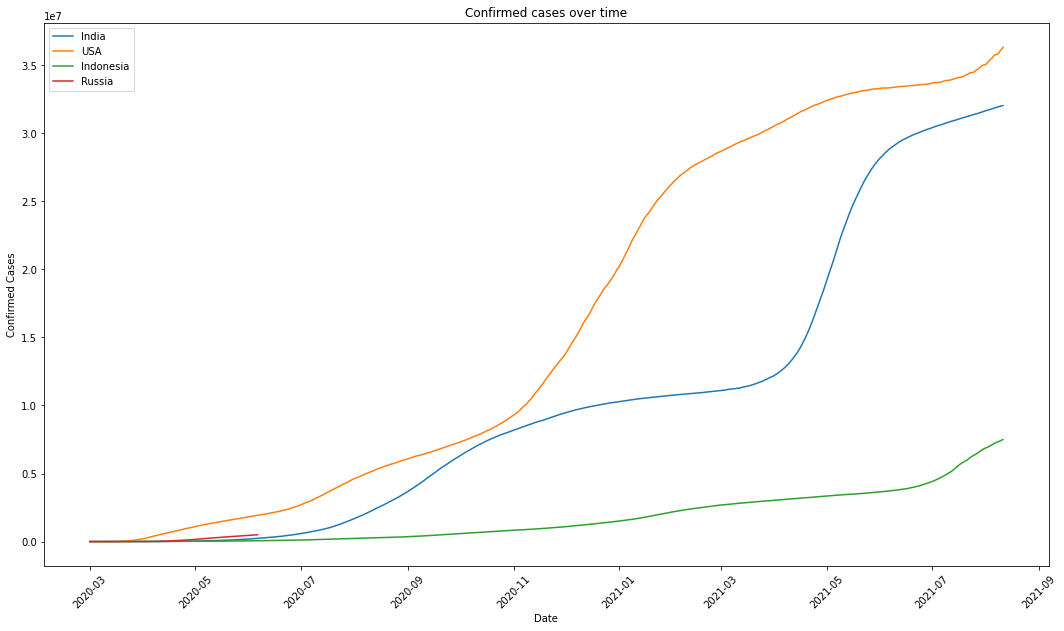

In [16]:
def confirmedPlotter():
    '''
    Input: None
    Returns: None
    '''
    group_date_india = india_df.groupby(["date"]).sum()
    group_date_us = us_df.groupby(["date"]).sum()
    group_date_indonesia = indonesia_df.groupby(["date"]).sum()
    group_date_russia = russia_df.groupby(["date"]).sum()

    confirm_date_india = colToList(group_date_india, 'confirmed')
    confirm_date_us = colToList(group_date_us, 'confirmed')
    confirm_date_indonesia = colToList(group_date_indonesia, 'confirmed')
    confirm_date_russia = colToList(group_date_russia, 'confirmed')
    confirm_date_russia += 431*[None]           #the russian dataset isn't extensive and is missing a lot of values, so we fill them in
                                                #to make sure that pyplot doesn't freak out when plotting our data.
    date_list = list(group_date_indonesia.index)

    plt.figure(figsize=(18, 10))
    plt.plot(date_list, confirm_date_india, label='India')
    plt.plot(date_list, confirm_date_us, label='USA')
    plt.plot(date_list, confirm_date_indonesia, label='Indonesia')
    plt.plot(date_list, confirm_date_russia, label='Russia')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.title('Confirmed cases over time')
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()
confirmedPlotter()

We use the same principles from above to plot the number of dead people in these countries.

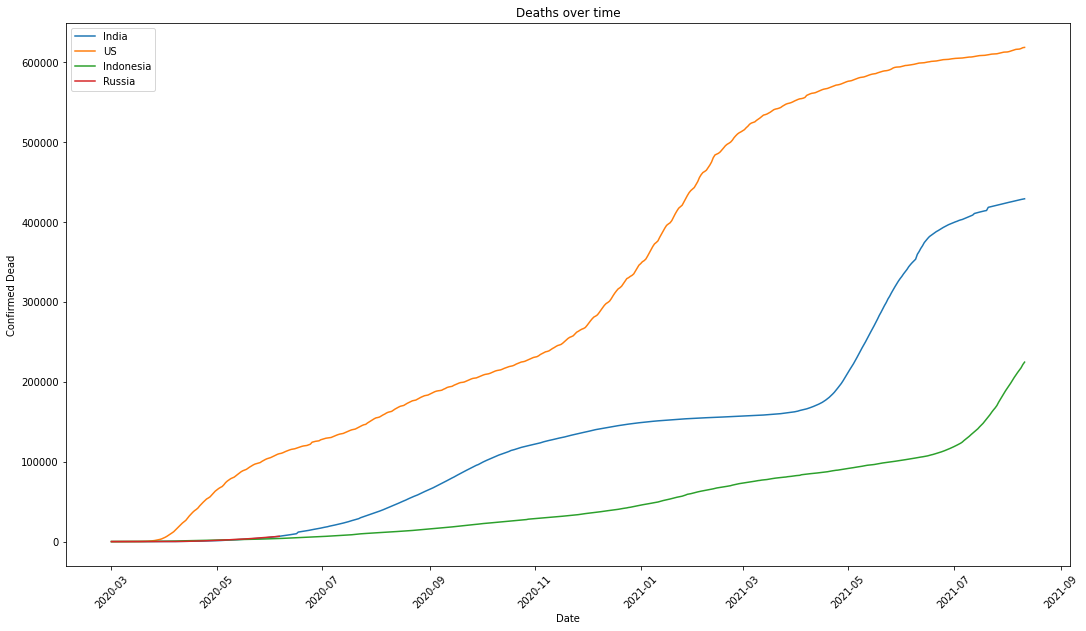

In [17]:
def deadPlotter():
    '''
    Input: None
    Returns: None
    '''
    group_date_india = india_df.groupby(["date"]).sum()
    group_date_us = us_df.groupby(["date"]).sum()
    group_date_russia = russia_df.groupby(['date']).sum()
    group_date_indonesia = indonesia_df.groupby(["date"]).sum()

    deaths_date_india = colToList(group_date_india, 'deaths')
    deaths_date_us = colToList(group_date_us, 'deaths')
    deaths_date_indonesia = colToList(group_date_indonesia, 'deaths')
    deaths_date_russia = colToList(group_date_russia, 'deaths') + (529-98)*[None]

    global date_list 
    date_list = list(group_date_india.index)

    plt.figure(figsize=(18, 10))
    plt.plot(date_list, deaths_date_india, label='India')
    plt.plot(date_list, deaths_date_us, label='US')
    plt.plot(date_list, deaths_date_indonesia, label='Indonesia')
    plt.plot(date_list, deaths_date_russia, label='Russia')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Dead')
    plt.title('Deaths over time')
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()
deadPlotter()

Now, we start plotting data by the regions in the country. We define regionPlotter(df, column) to graph data from df using the column name we pass. The first line in the function gives us a dictionary in which our keys are the names of the regions in df, and values are dataframes which only contain data for the region in our key.

We also plot a few bar graphs comparing the average number of confirmed cases in a state with other states, to visualize state case counts.

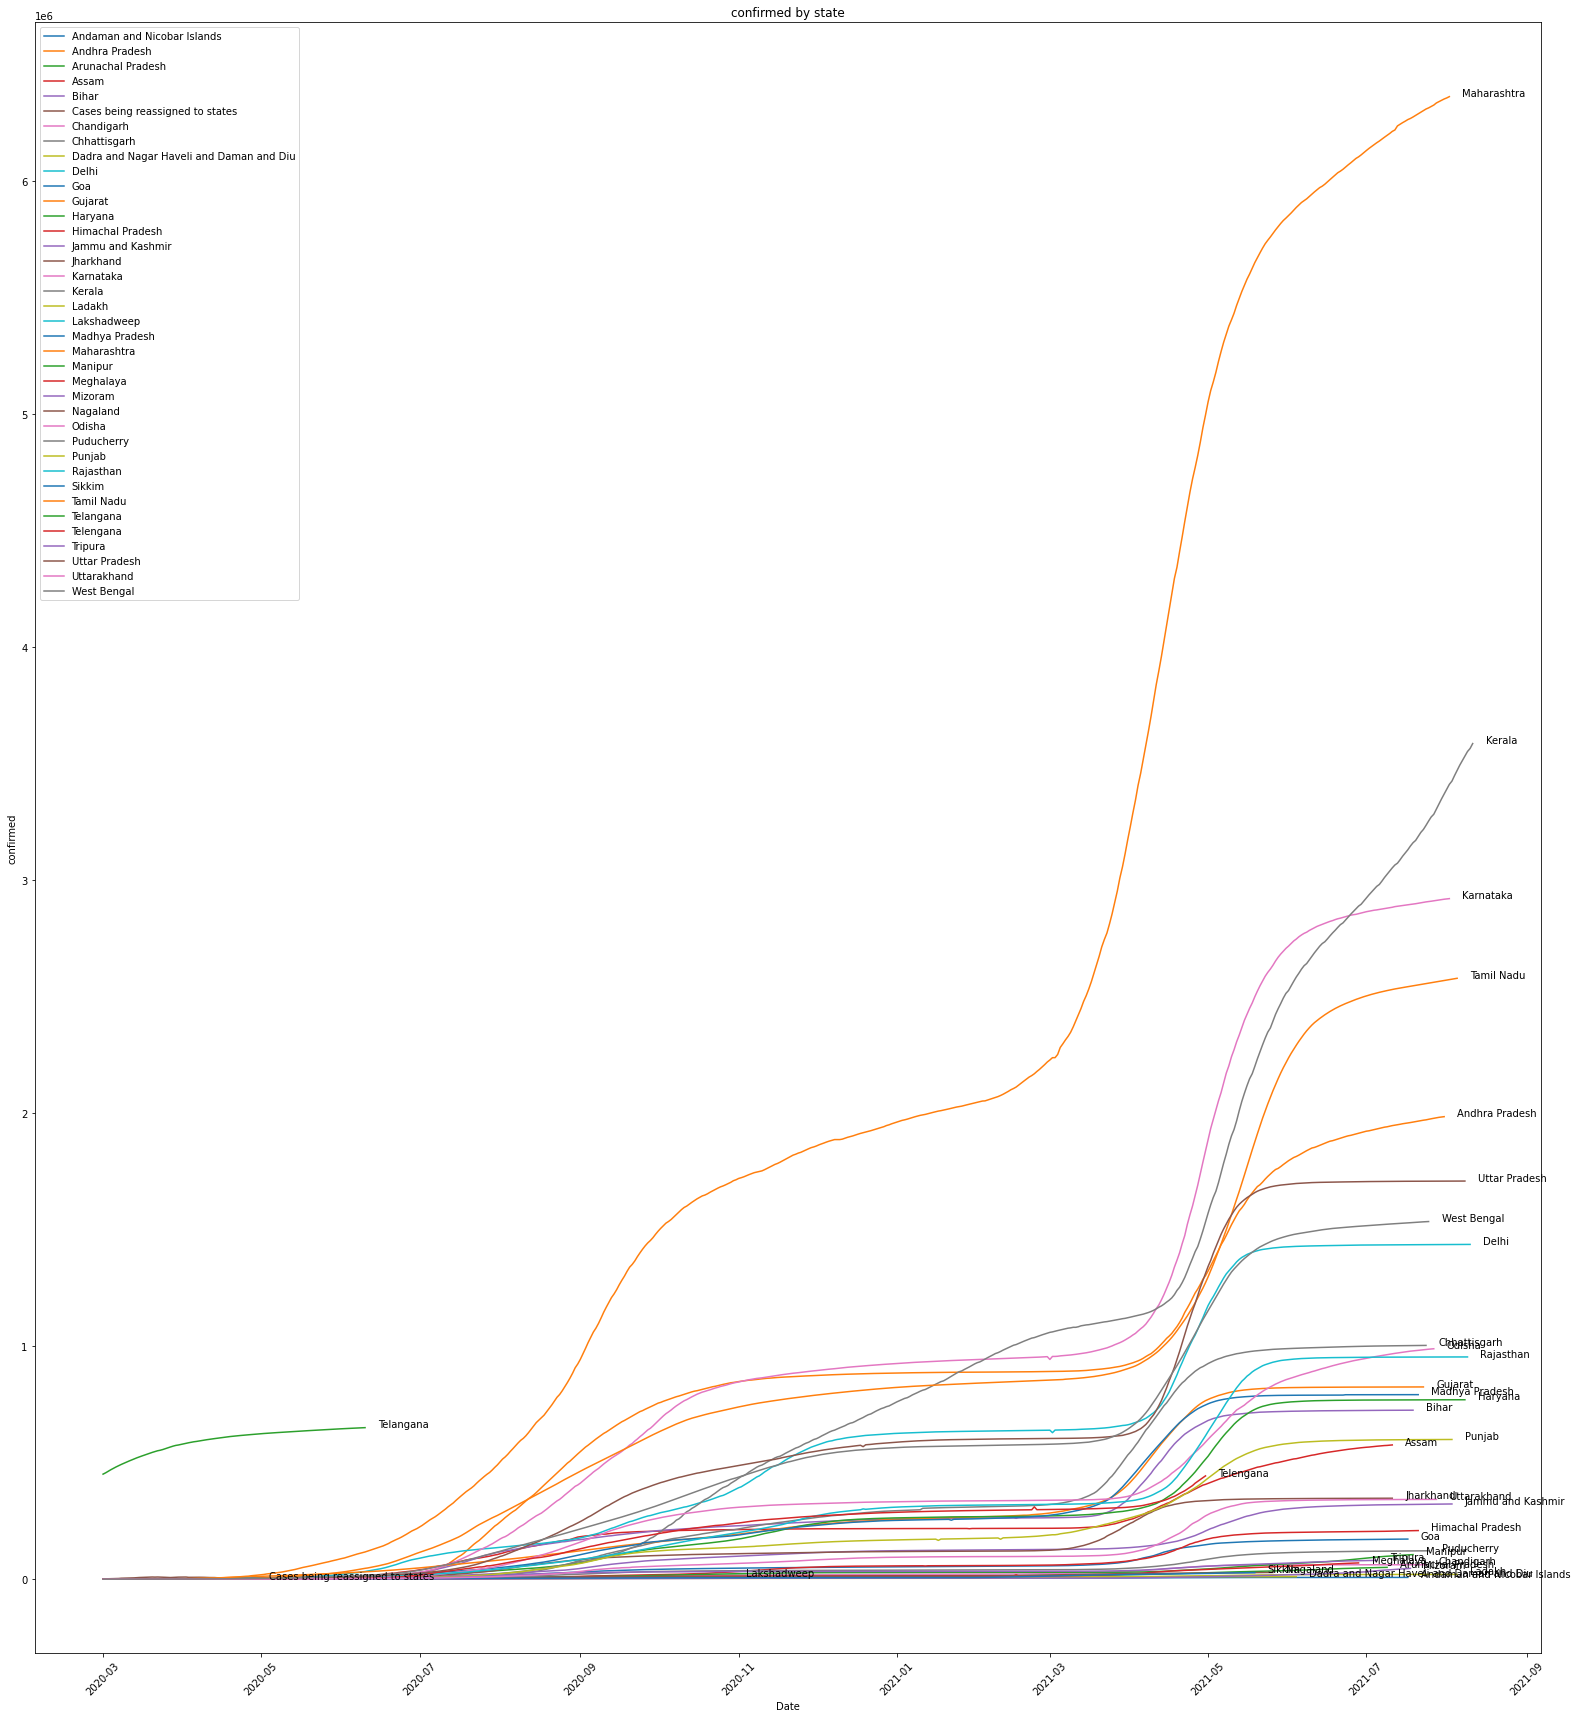

In [18]:
def regionPlotter(df, column):
    '''
    Input: DataFrame, column from DataFrame (string)
    Returns: None
    '''
    dfs = dict(tuple(df.groupby(['region'])))
    plt.figure(figsize=(27, 30))
    for i in dfs.keys():
        if len(dfs[i]) < 30:      #Our datasets have 'ghost' regions with barely any values, so we ignore these regions here.
            continue          
        if i == 'Moscow' or i == 'Indonesia':  #For some reason, Moscow and Indonesia as keys map to national case/death counts, so we ignore them.
            continue
        region_list = colToList(dfs[i], column)
        if region_list[0] == None: continue  #Skips region if its data is empty
        num = -1                             #This line and the for loop below calculate where the data for a region ends, 
                                             #so that we can add a label at the end of a region's line inside our graph! (plt.text())  
        for j in range(-1, -(len(region_list)), -1):
            if region_list[j] != None:
                num = j
                break
        num += len(region_list)
        region_list += (len(date_list)-len(region_list))*[None]      
        plt.plot(date_list, region_list, label=f'{i}')
        plt.text(date_list[num]+timedelta(days=5), region_list[num], f'{i}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(column + ' by state')
    plt.xticks(rotation=45)
    plt.legend(loc = 'upper left')
    plt.show()
regionPlotter(india_df, 'confirmed')

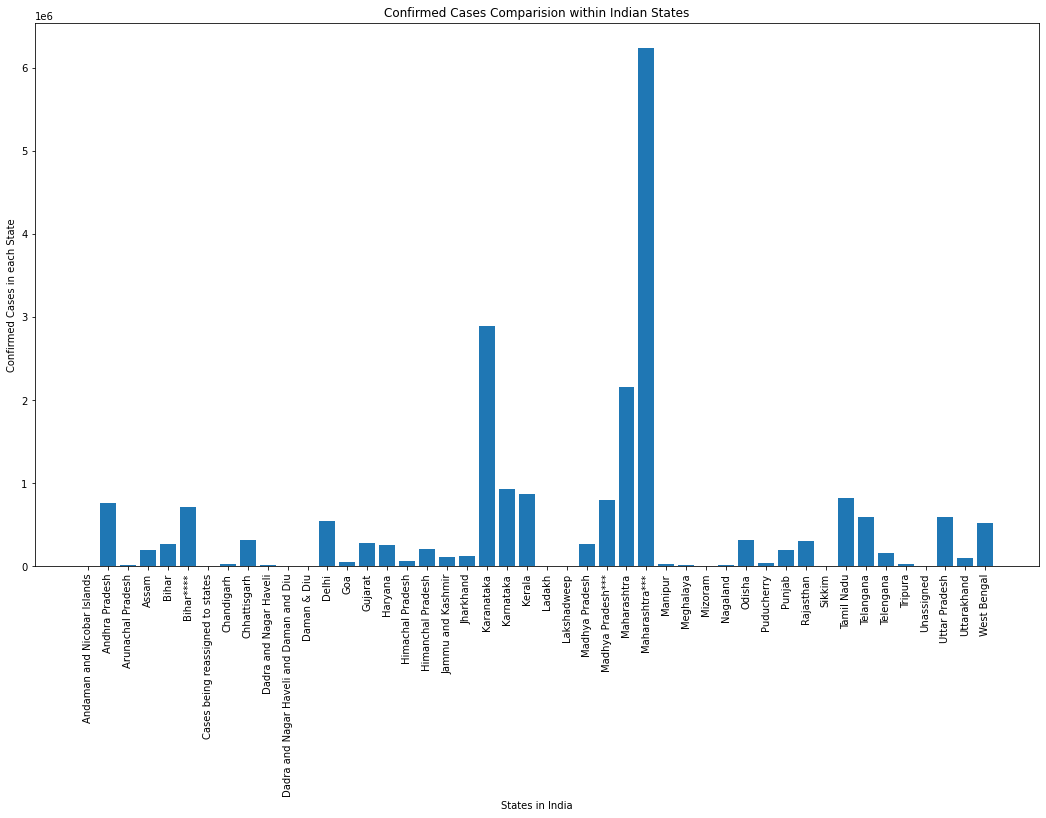

None


In [19]:
def confirm_india_region():

    """
    Inputs : None
    
    Plots the confirmed cases within India and compares it to different states
    
    Return Value : None
    """
    
    group_region_india = india_df.groupby(["region"]).mean()
    confirmed_region_india = colToList(group_region_india, 'confirmed')

    region_list = list(group_region_india.index)

    plt.figure(figsize=(18, 10))
    cmap = plt.cm.tab10
    plt.bar(region_list, confirmed_region_india)
    plt.xlabel('States in India')
    plt.ylabel('Confirmed Cases in each State')
    plt.title('Confirmed Cases Comparision within Indian States')
    plt.xticks(rotation = 90)
    return plt.show()
print(confirm_india_region())

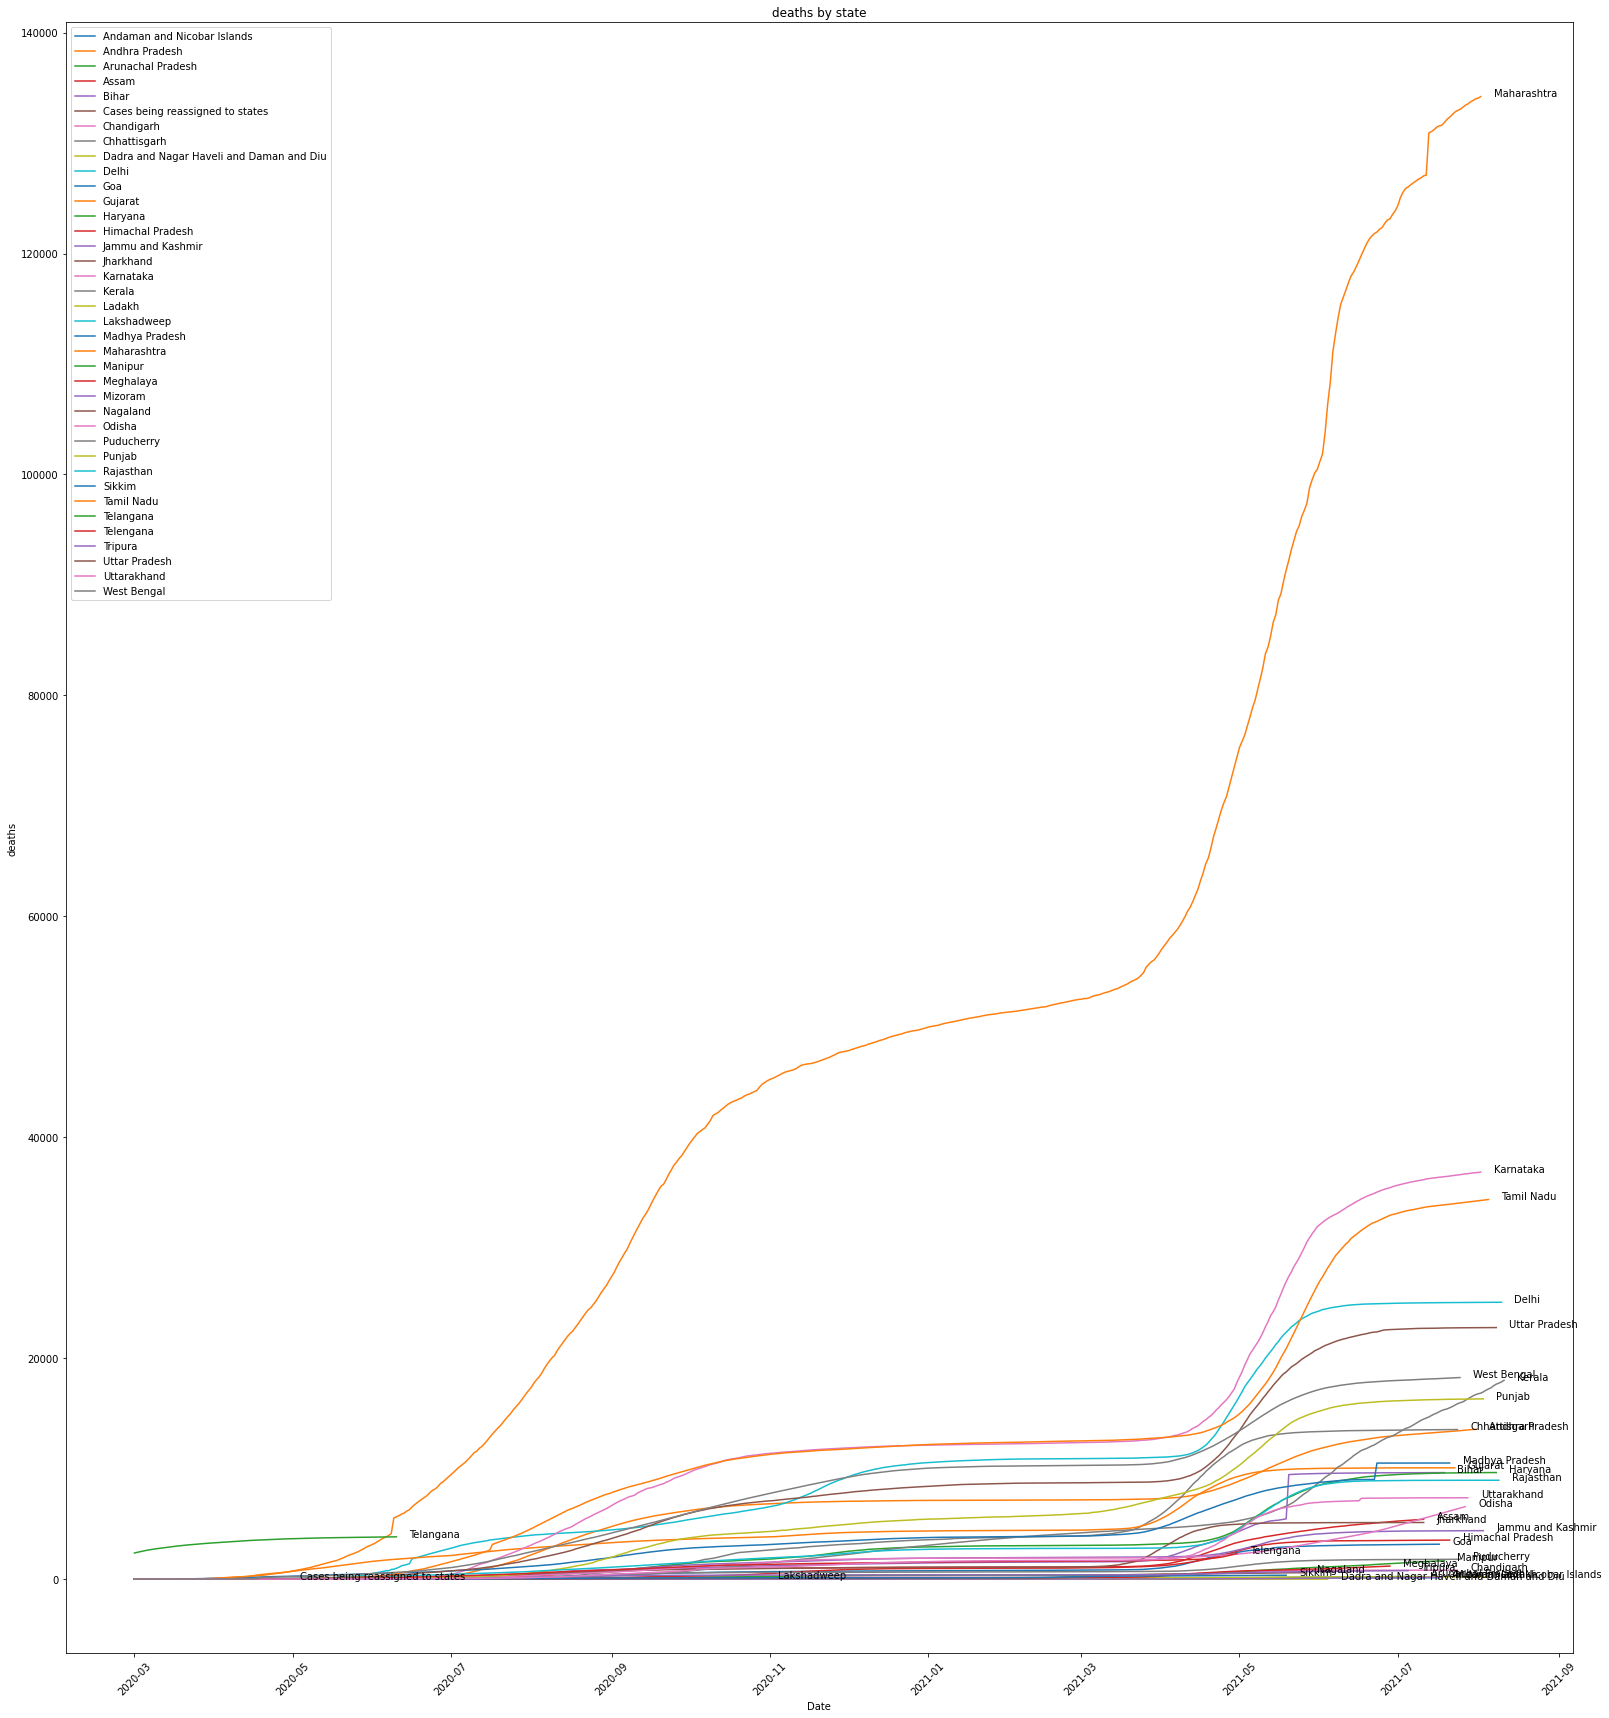

In [20]:
regionPlotter(india_df, 'deaths')

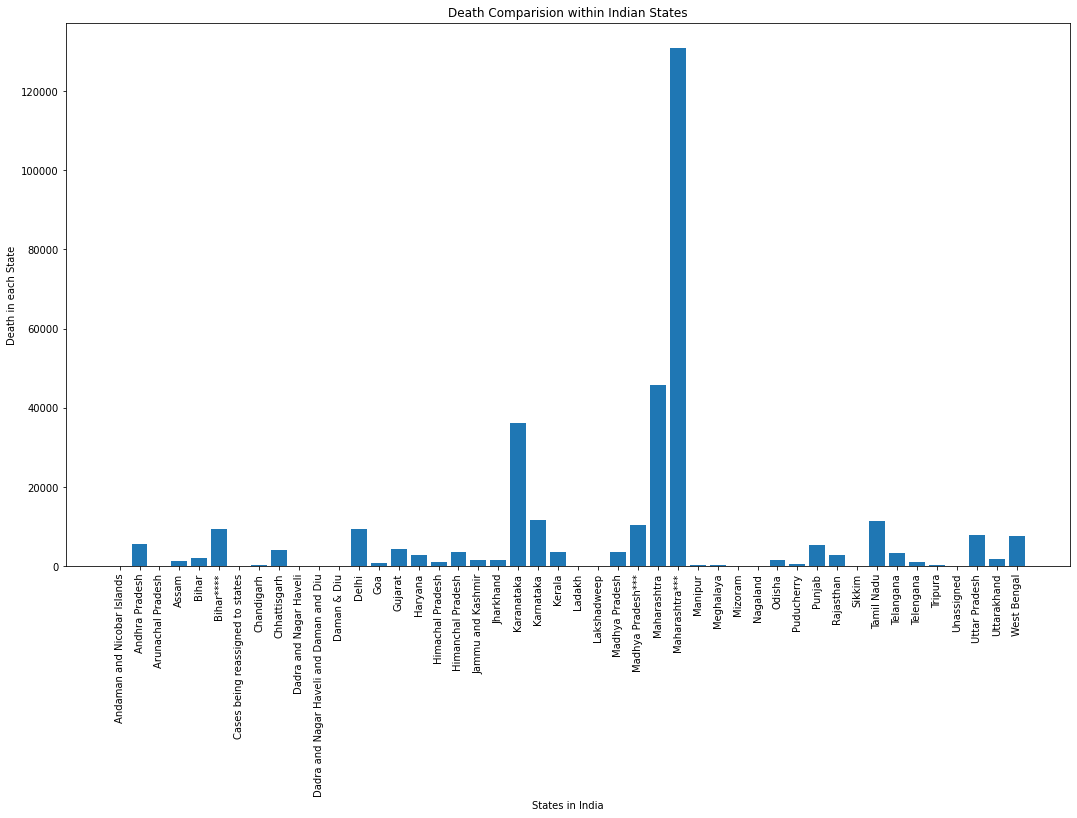

None


In [21]:
def death_india_region():

    """
    Inputs : None
    
    Plots the deaths within India and compares it to different states
    
    Return Value : None
    """
    
    group_region_india = india_df.groupby(["region"]).mean()
    deaths_region_india = colToList(group_region_india, 'deaths')

    region_list = list(group_region_india.index)

    plt.figure(figsize=(18, 10))
    cmap = plt.cm.tab10
    plt.bar(region_list, deaths_region_india)
    plt.xlabel('States in India')
    plt.ylabel('Death in each State')
    plt.title('Death Comparision within Indian States')
    plt.xticks(rotation = 90)
    return plt.show()
print(death_india_region())

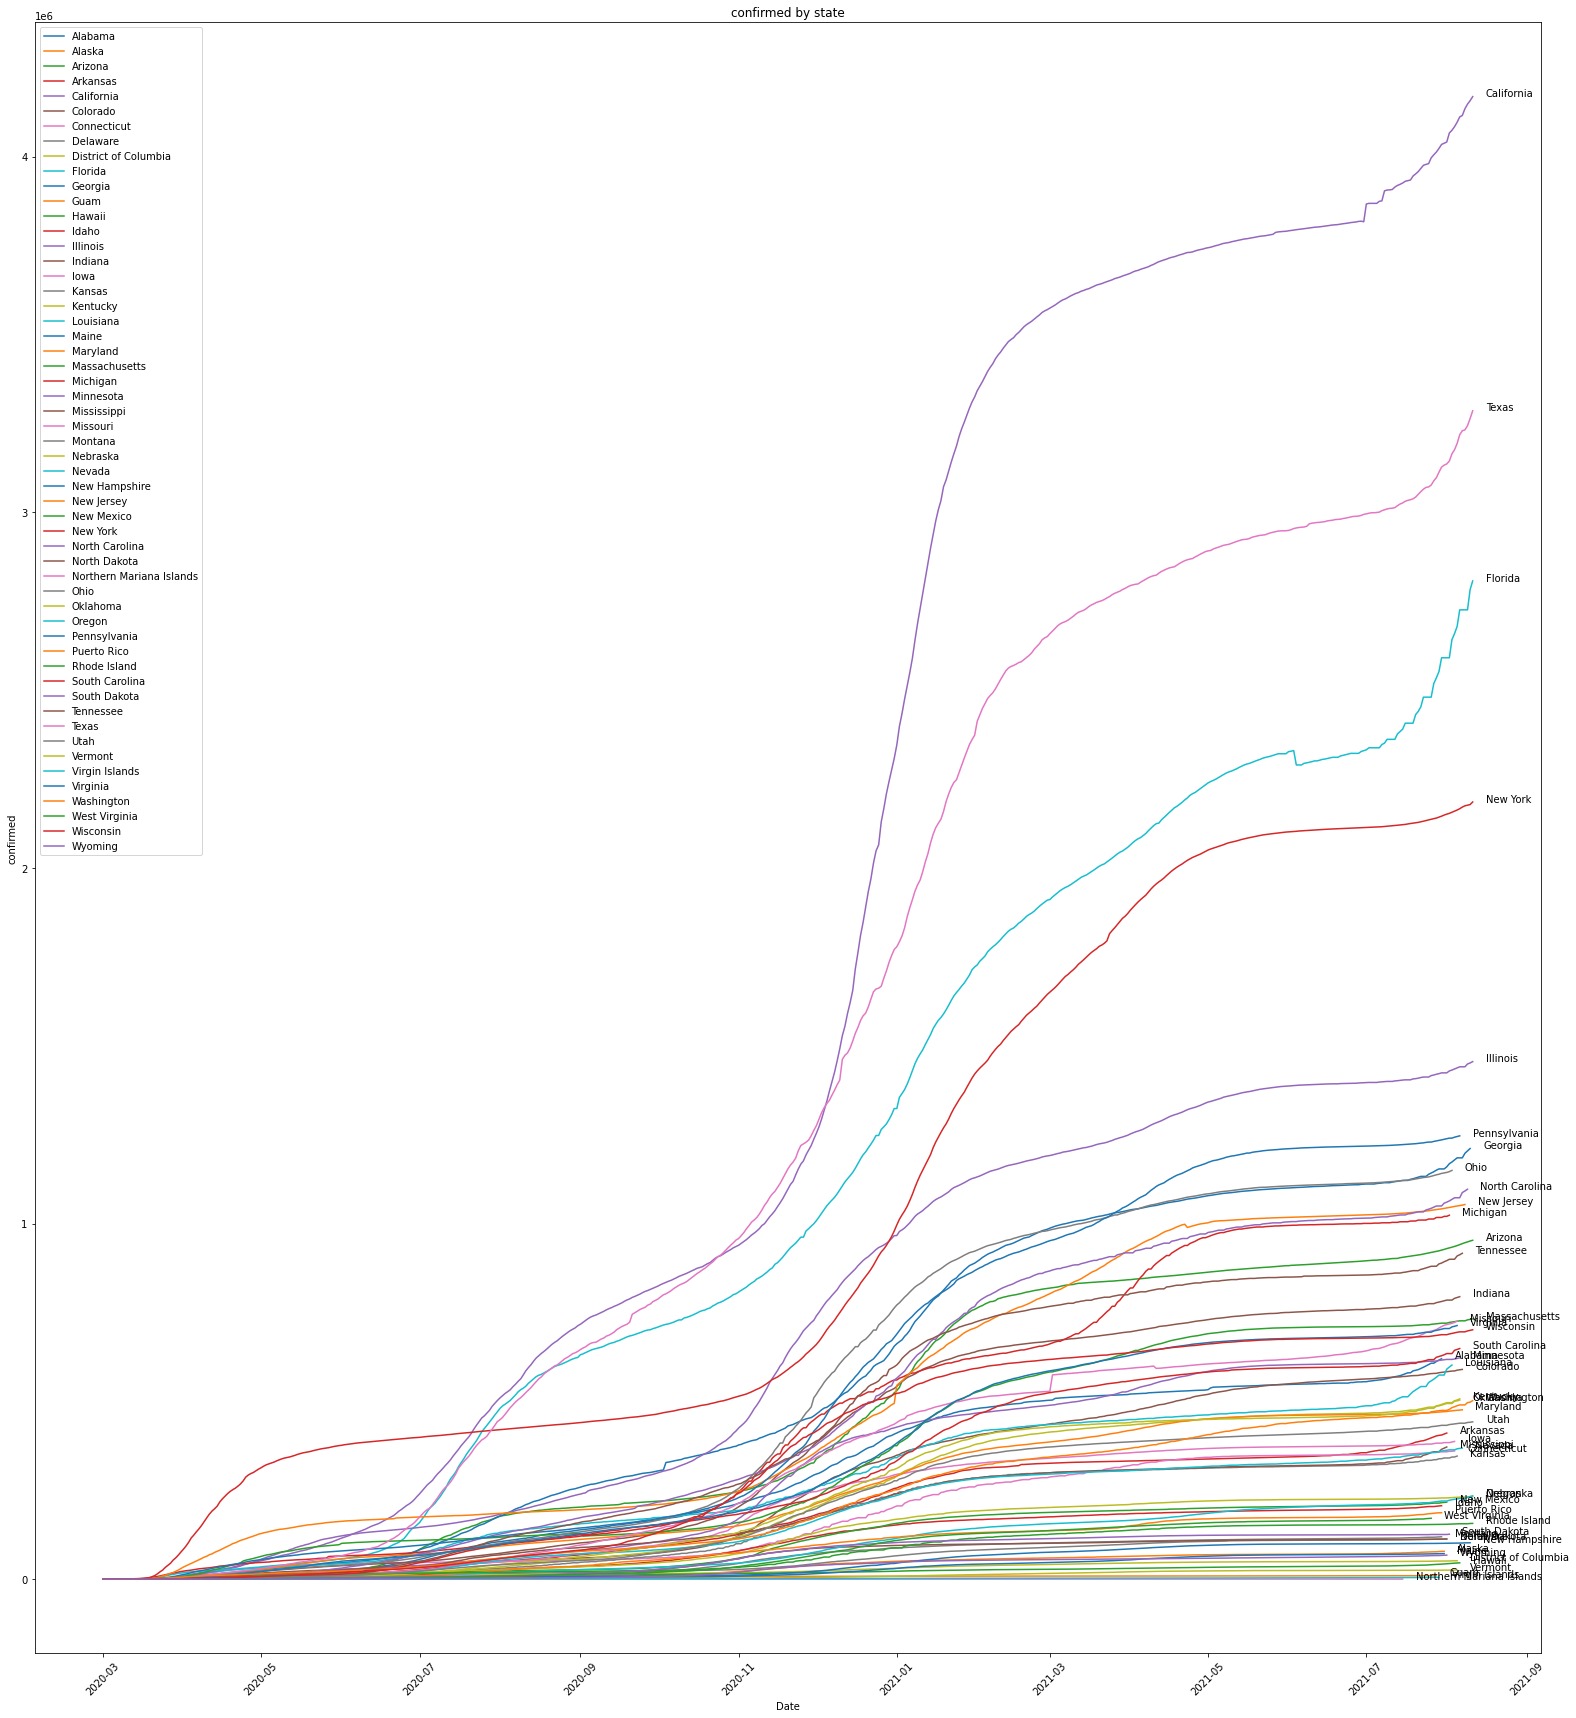

In [22]:
regionPlotter(us_df, 'confirmed')

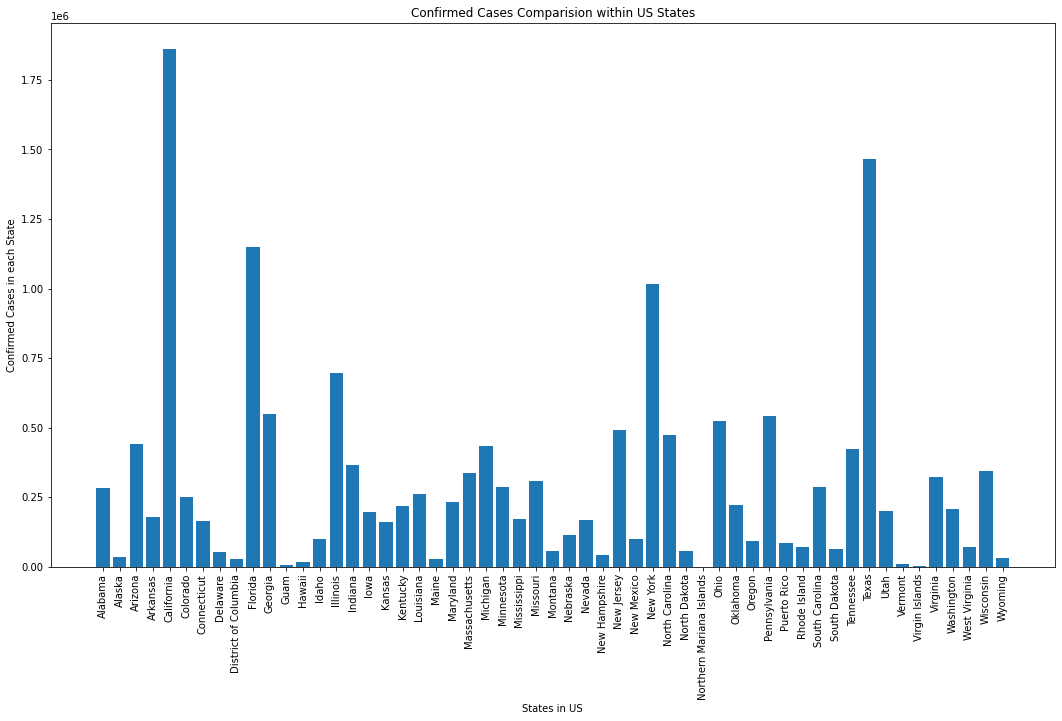

None


In [23]:
def confirmed_us_region():

    """
    Inputs : None
    
    Plots the confirmed cases within US and compares it to different states
    
    Return Value : None
    """

    group_region_us = us_df.groupby(["region"]).mean()
    confirmed_region_us = colToList(group_region_us, 'confirmed')

    region_list = list(group_region_us.index)

    plt.figure(figsize=(18, 10))
    cmap = plt.cm.tab10
    plt.bar(region_list, confirmed_region_us)
    plt.xlabel('States in US')
    plt.ylabel('Confirmed Cases in each State')
    plt.title('Confirmed Cases Comparision within US States')
    plt.xticks(rotation = 90)
    return plt.show()
print(confirmed_us_region())

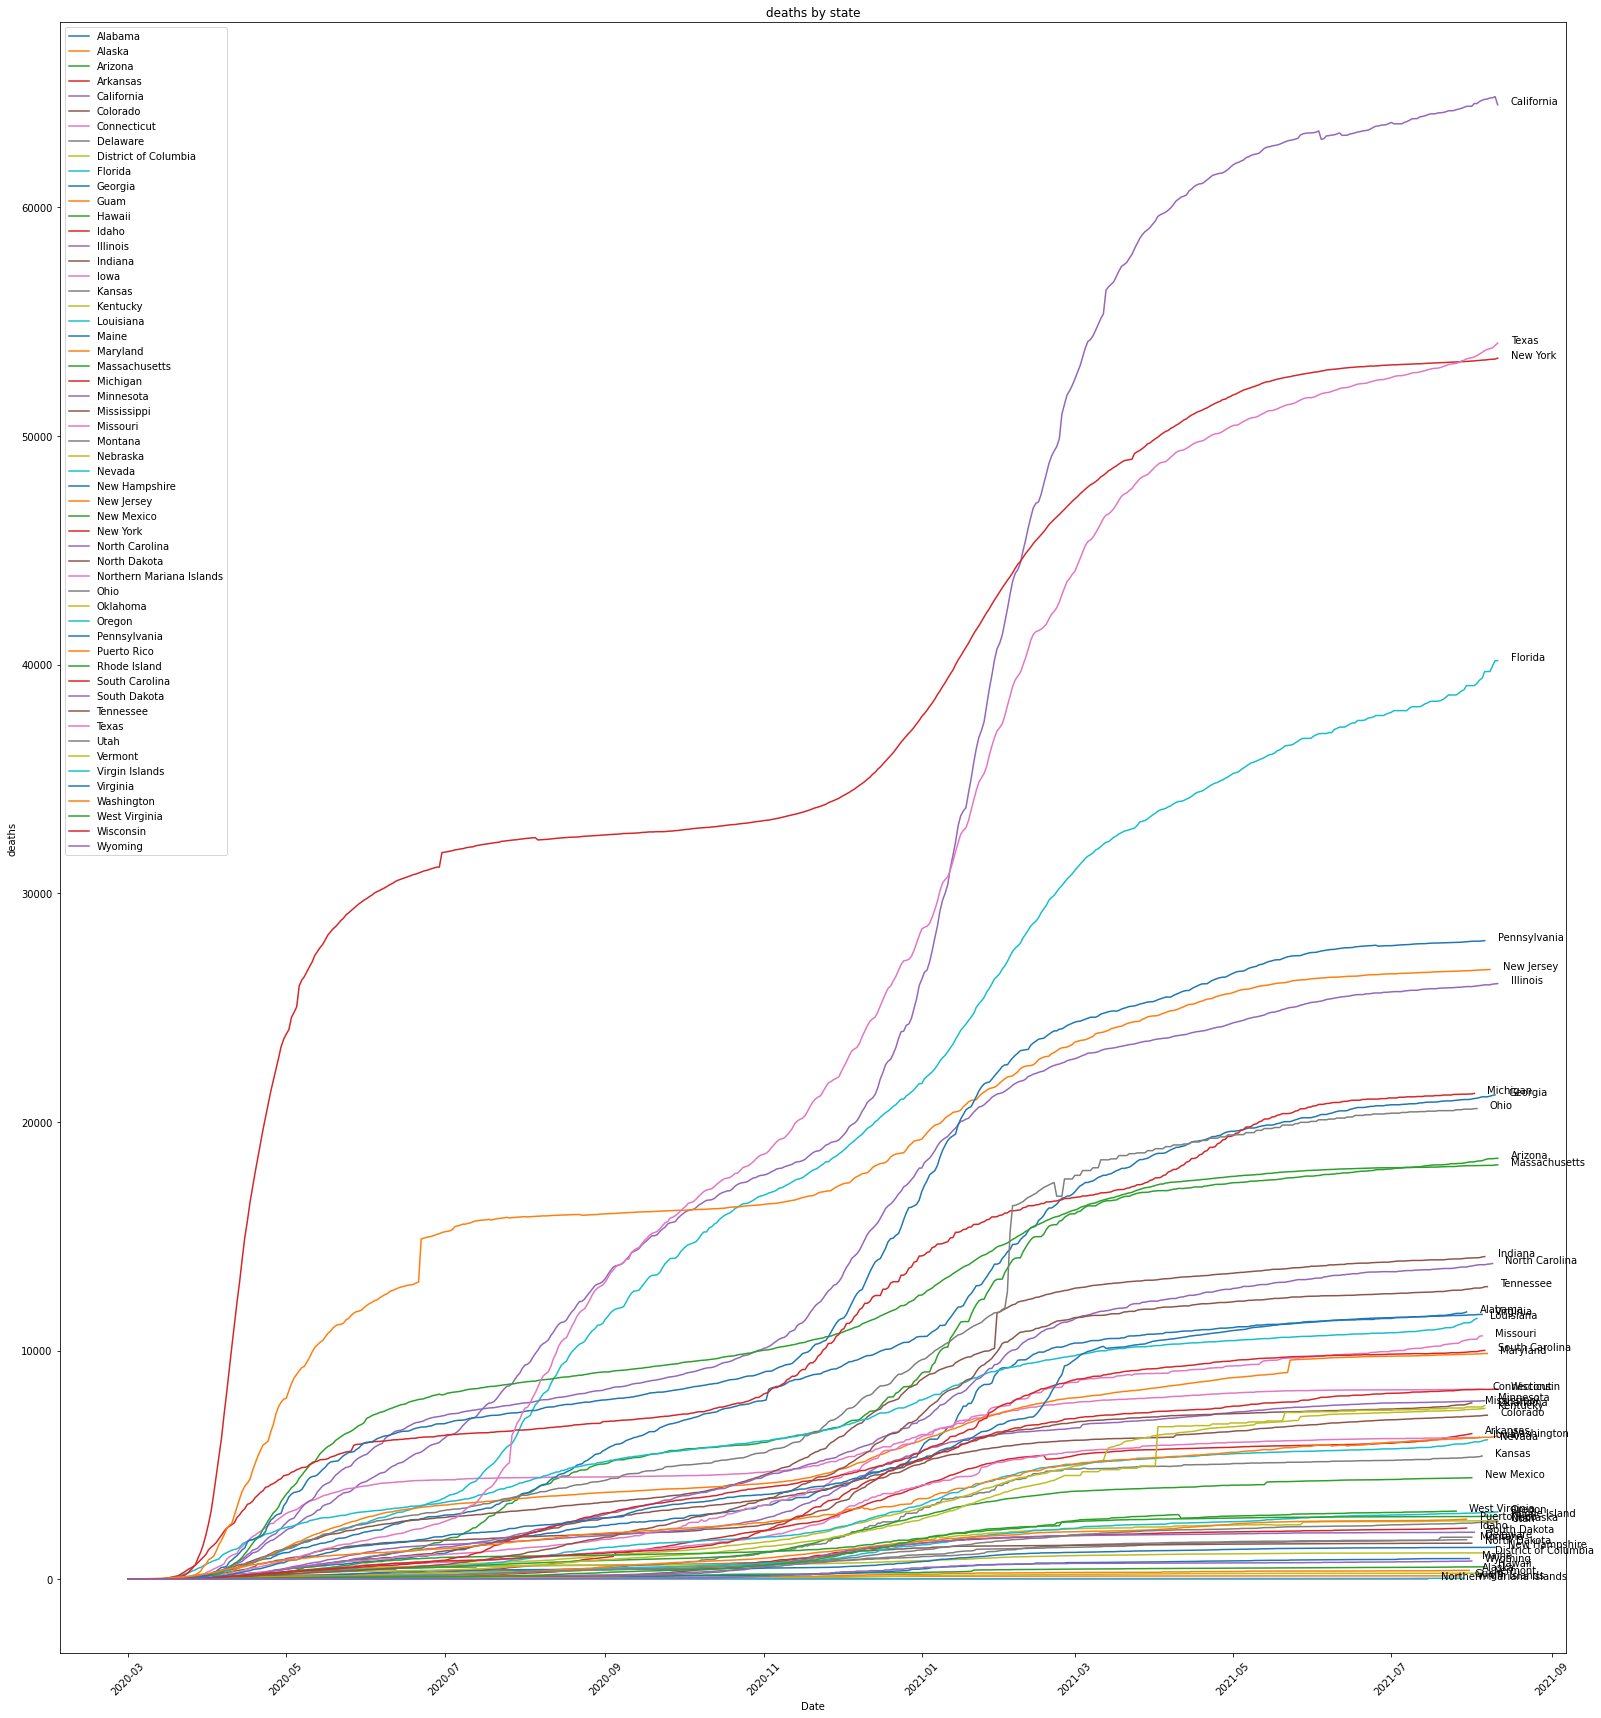

In [24]:
regionPlotter(us_df, 'deaths')

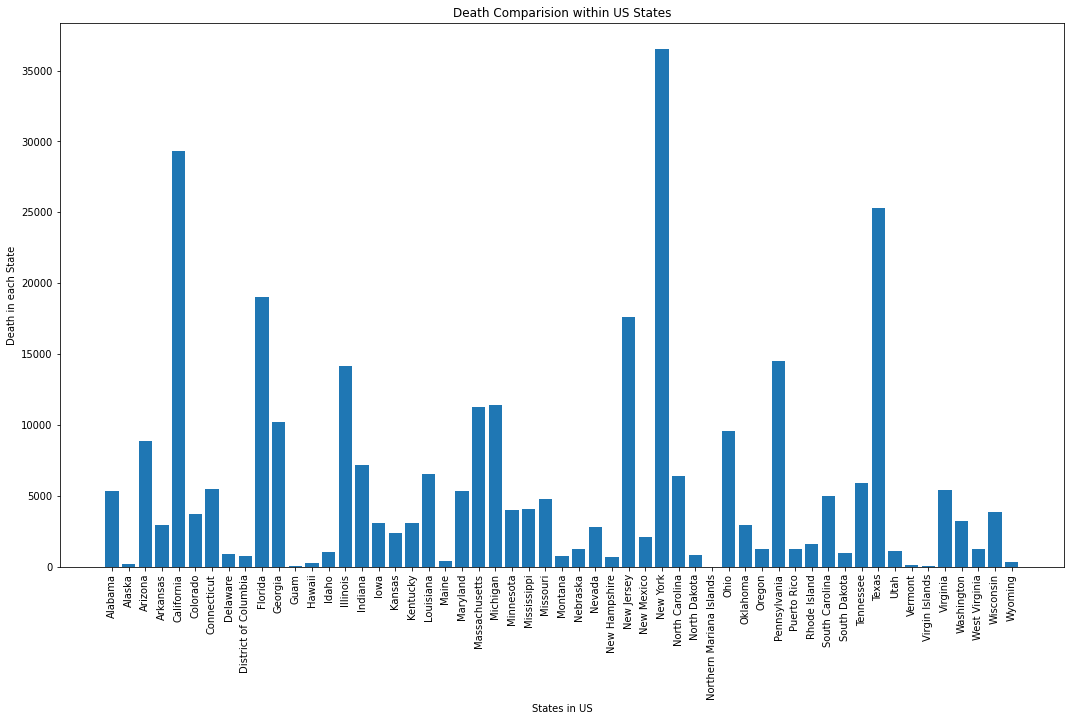

None


In [25]:
def death_us_region():

    """
    Inputs : None
    
    Plots the deaths within India and compares it to different states
    
    Return Value : None
    """
    
    group_region_us = us_df.groupby(["region"]).mean()
    deaths_region_us = colToList(group_region_us, 'deaths')

    region_list = list(group_region_us.index)

    plt.figure(figsize=(18, 10))
    cmap = plt.cm.tab10
    plt.bar(region_list, deaths_region_us)
    plt.xlabel('States in US')
    plt.ylabel('Death in each State')
    plt.title('Death Comparision within US States')
    plt.xticks(rotation = 90)
    return plt.show()
print(death_us_region())

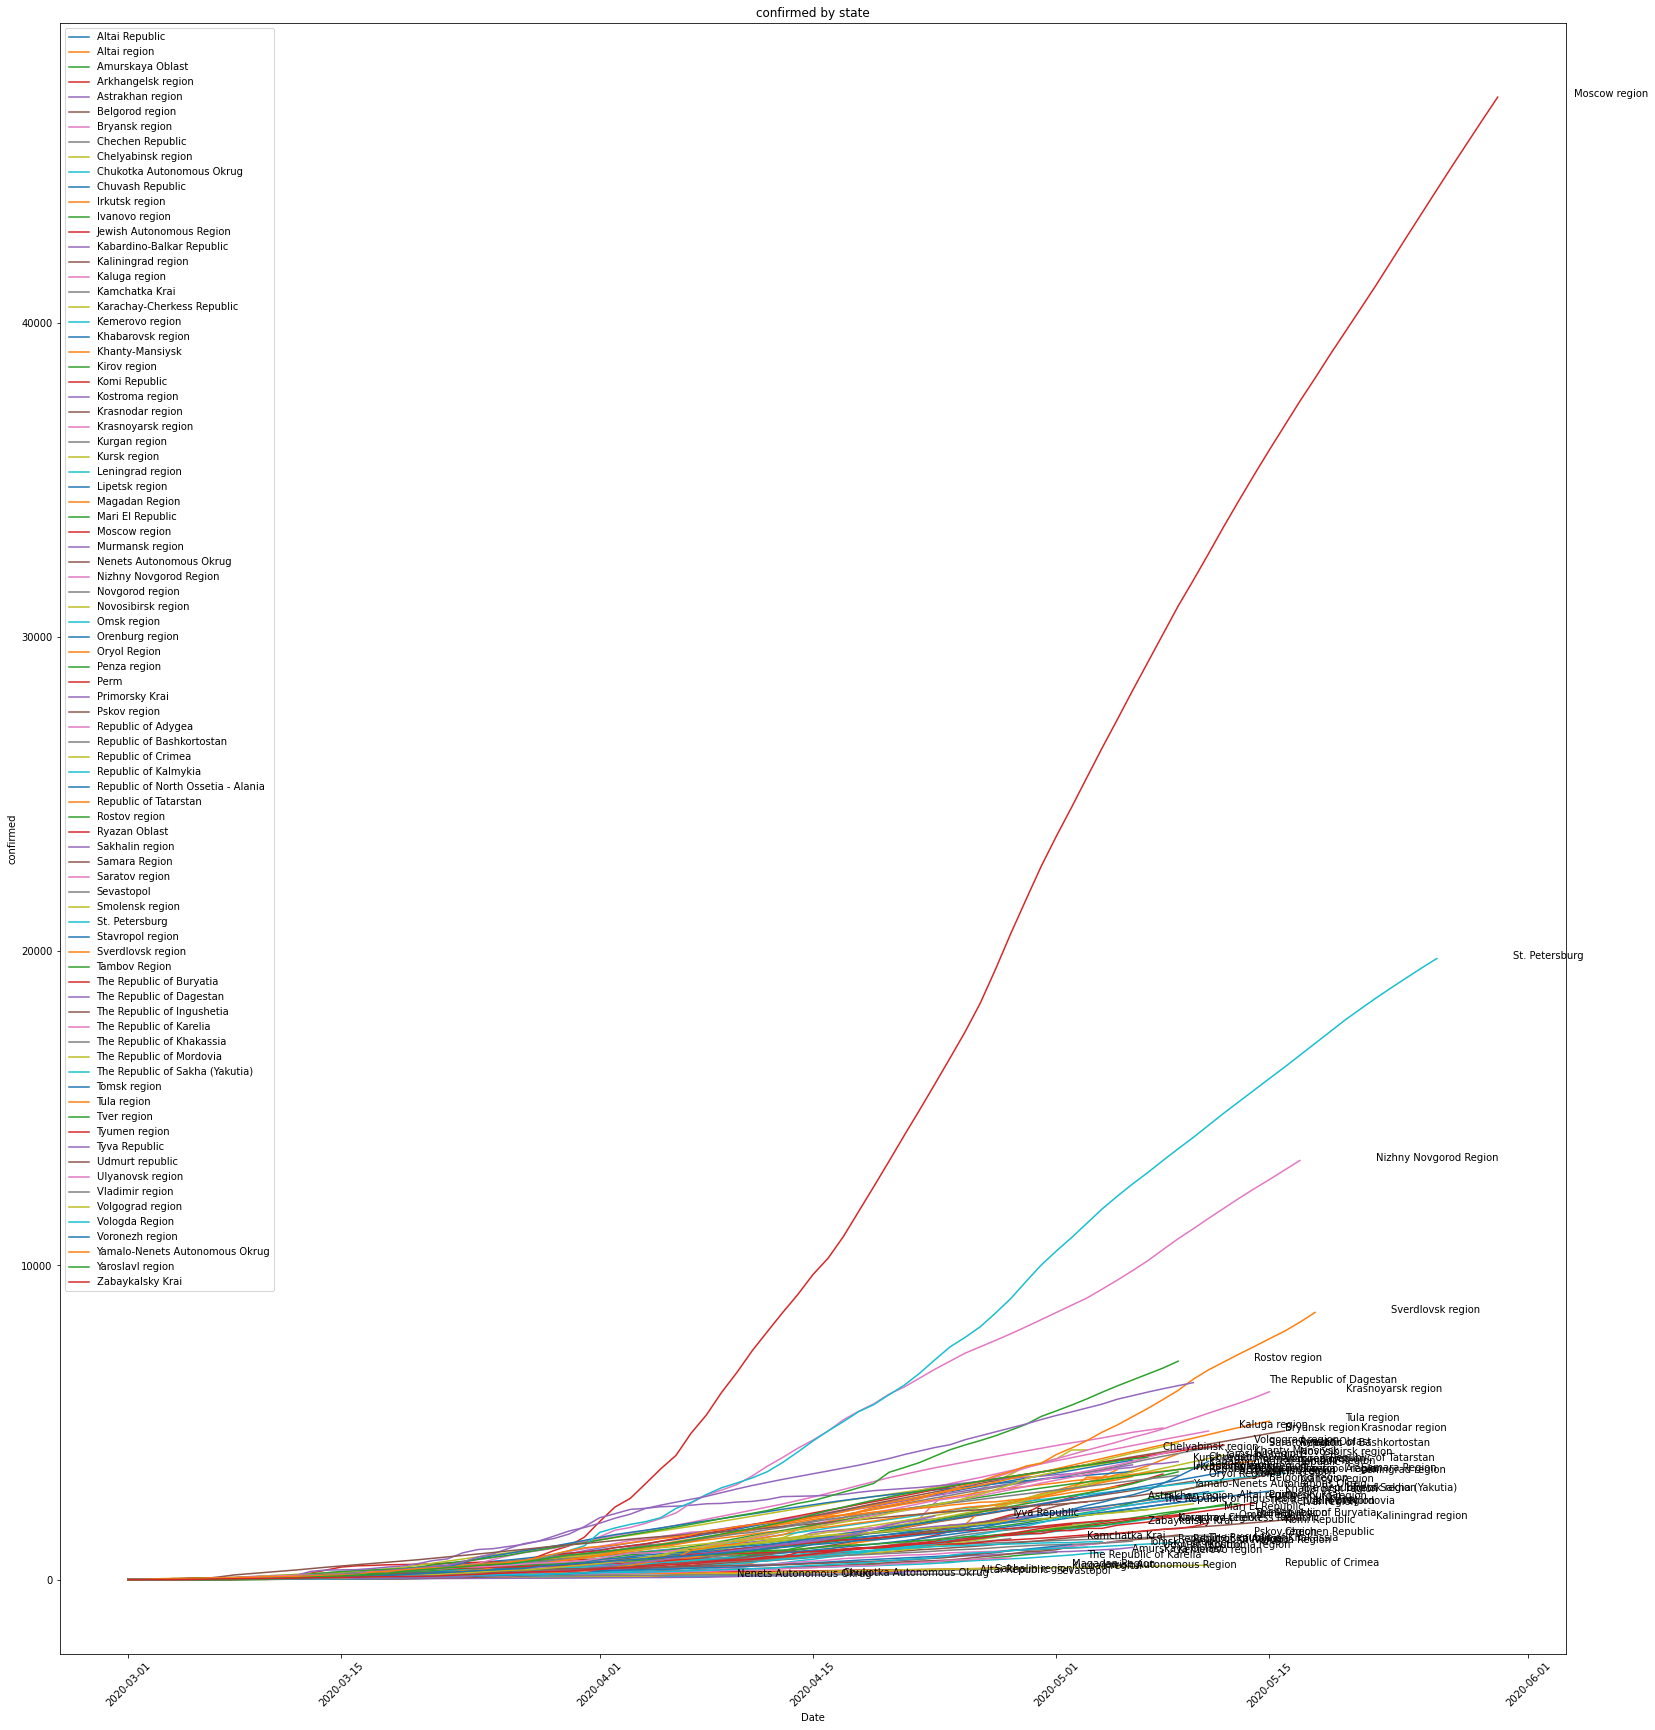

In [26]:
regionPlotter(russia_df, 'confirmed')

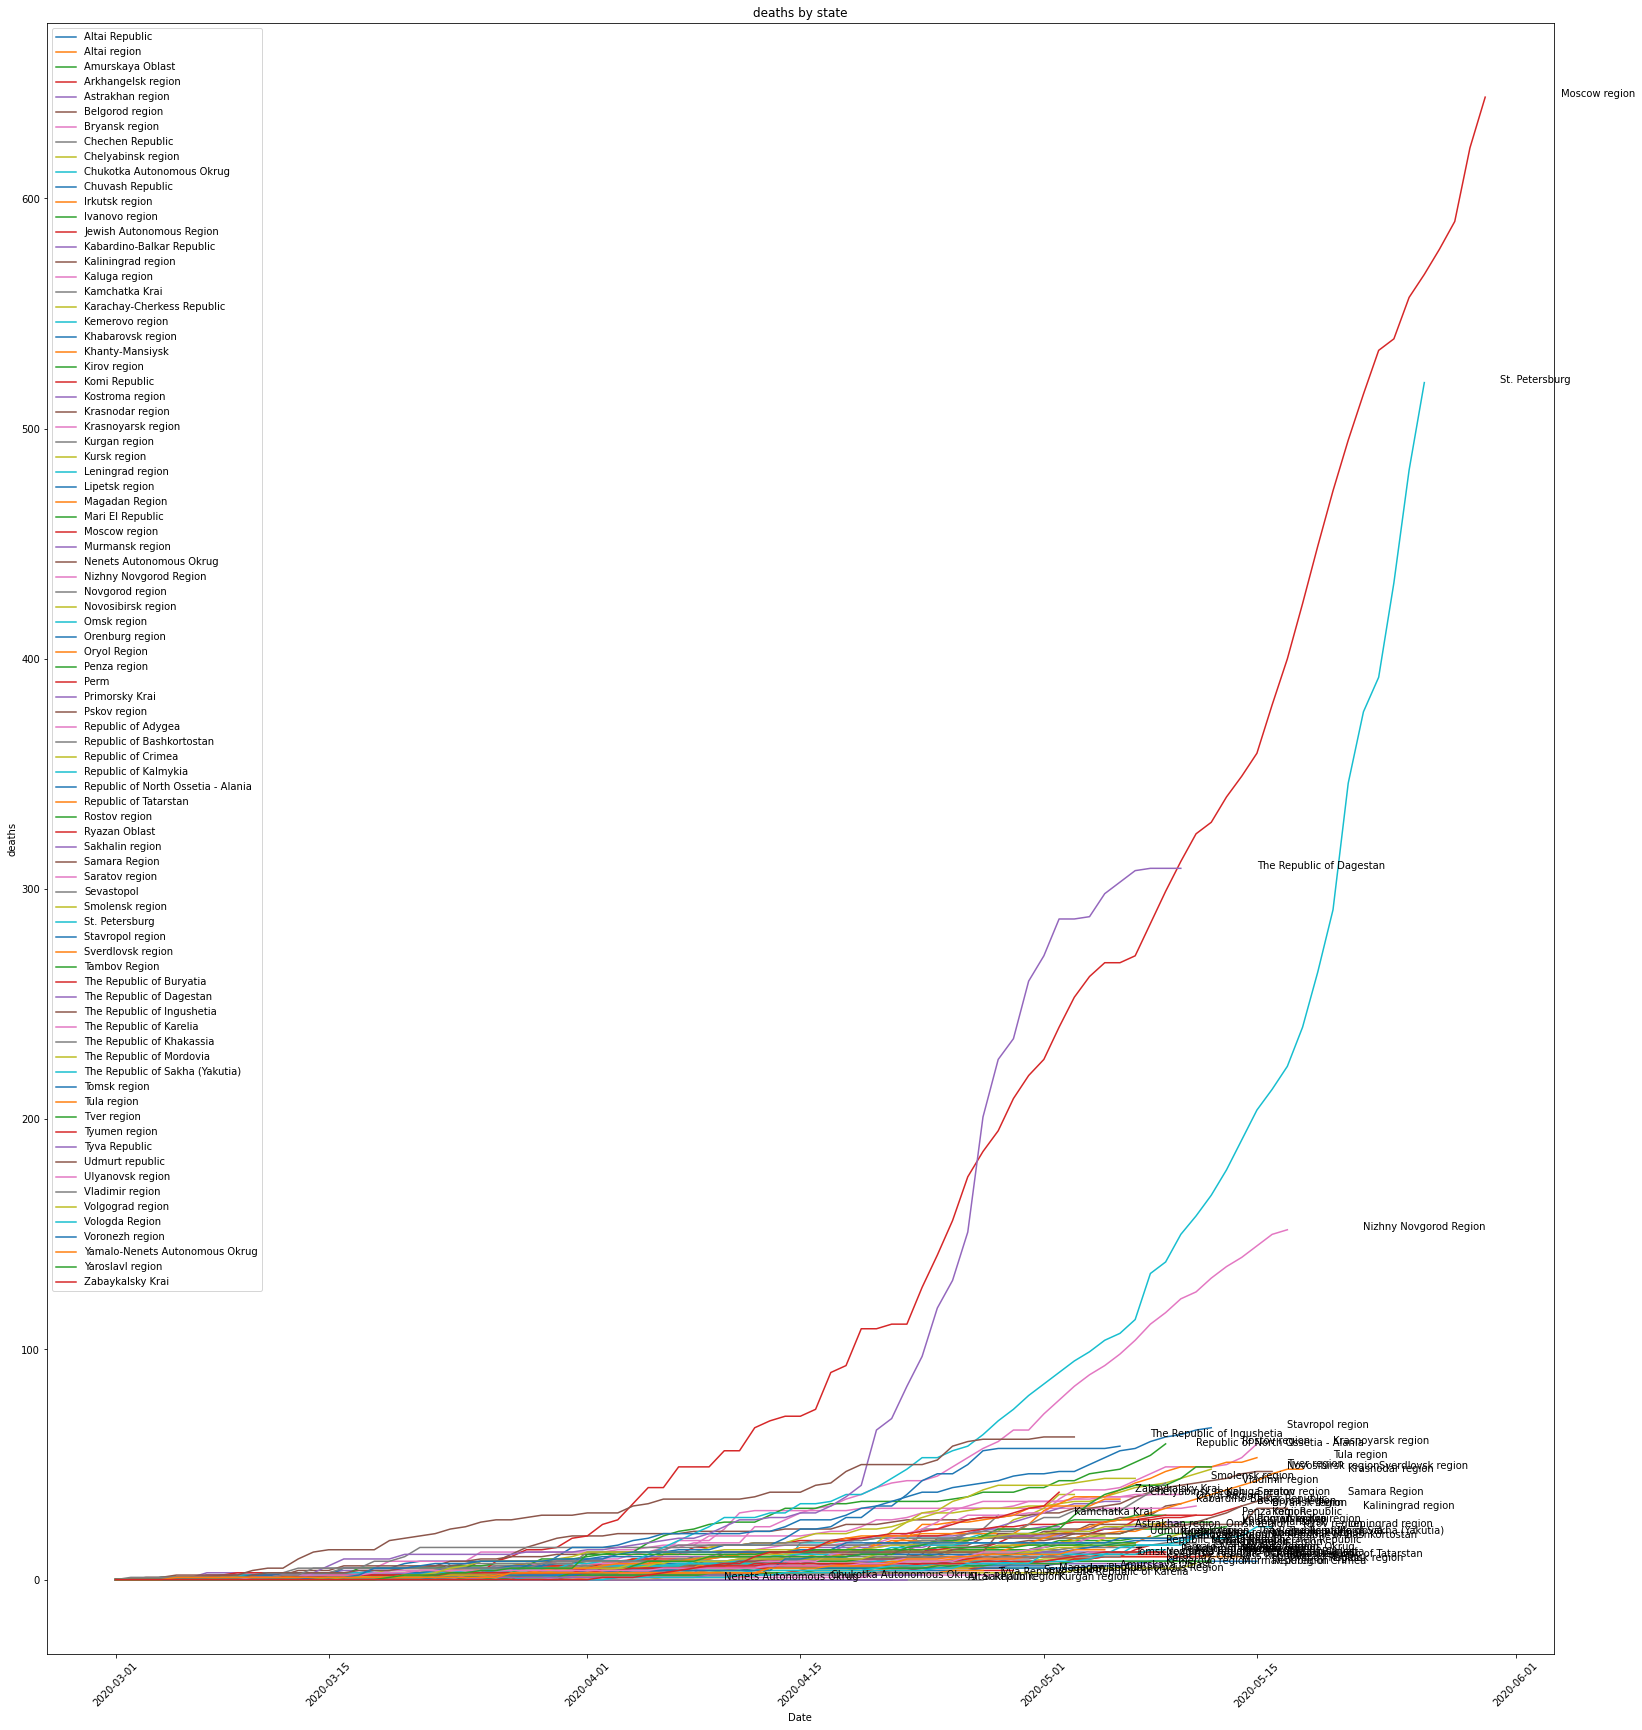

In [27]:
regionPlotter(russia_df, 'deaths')

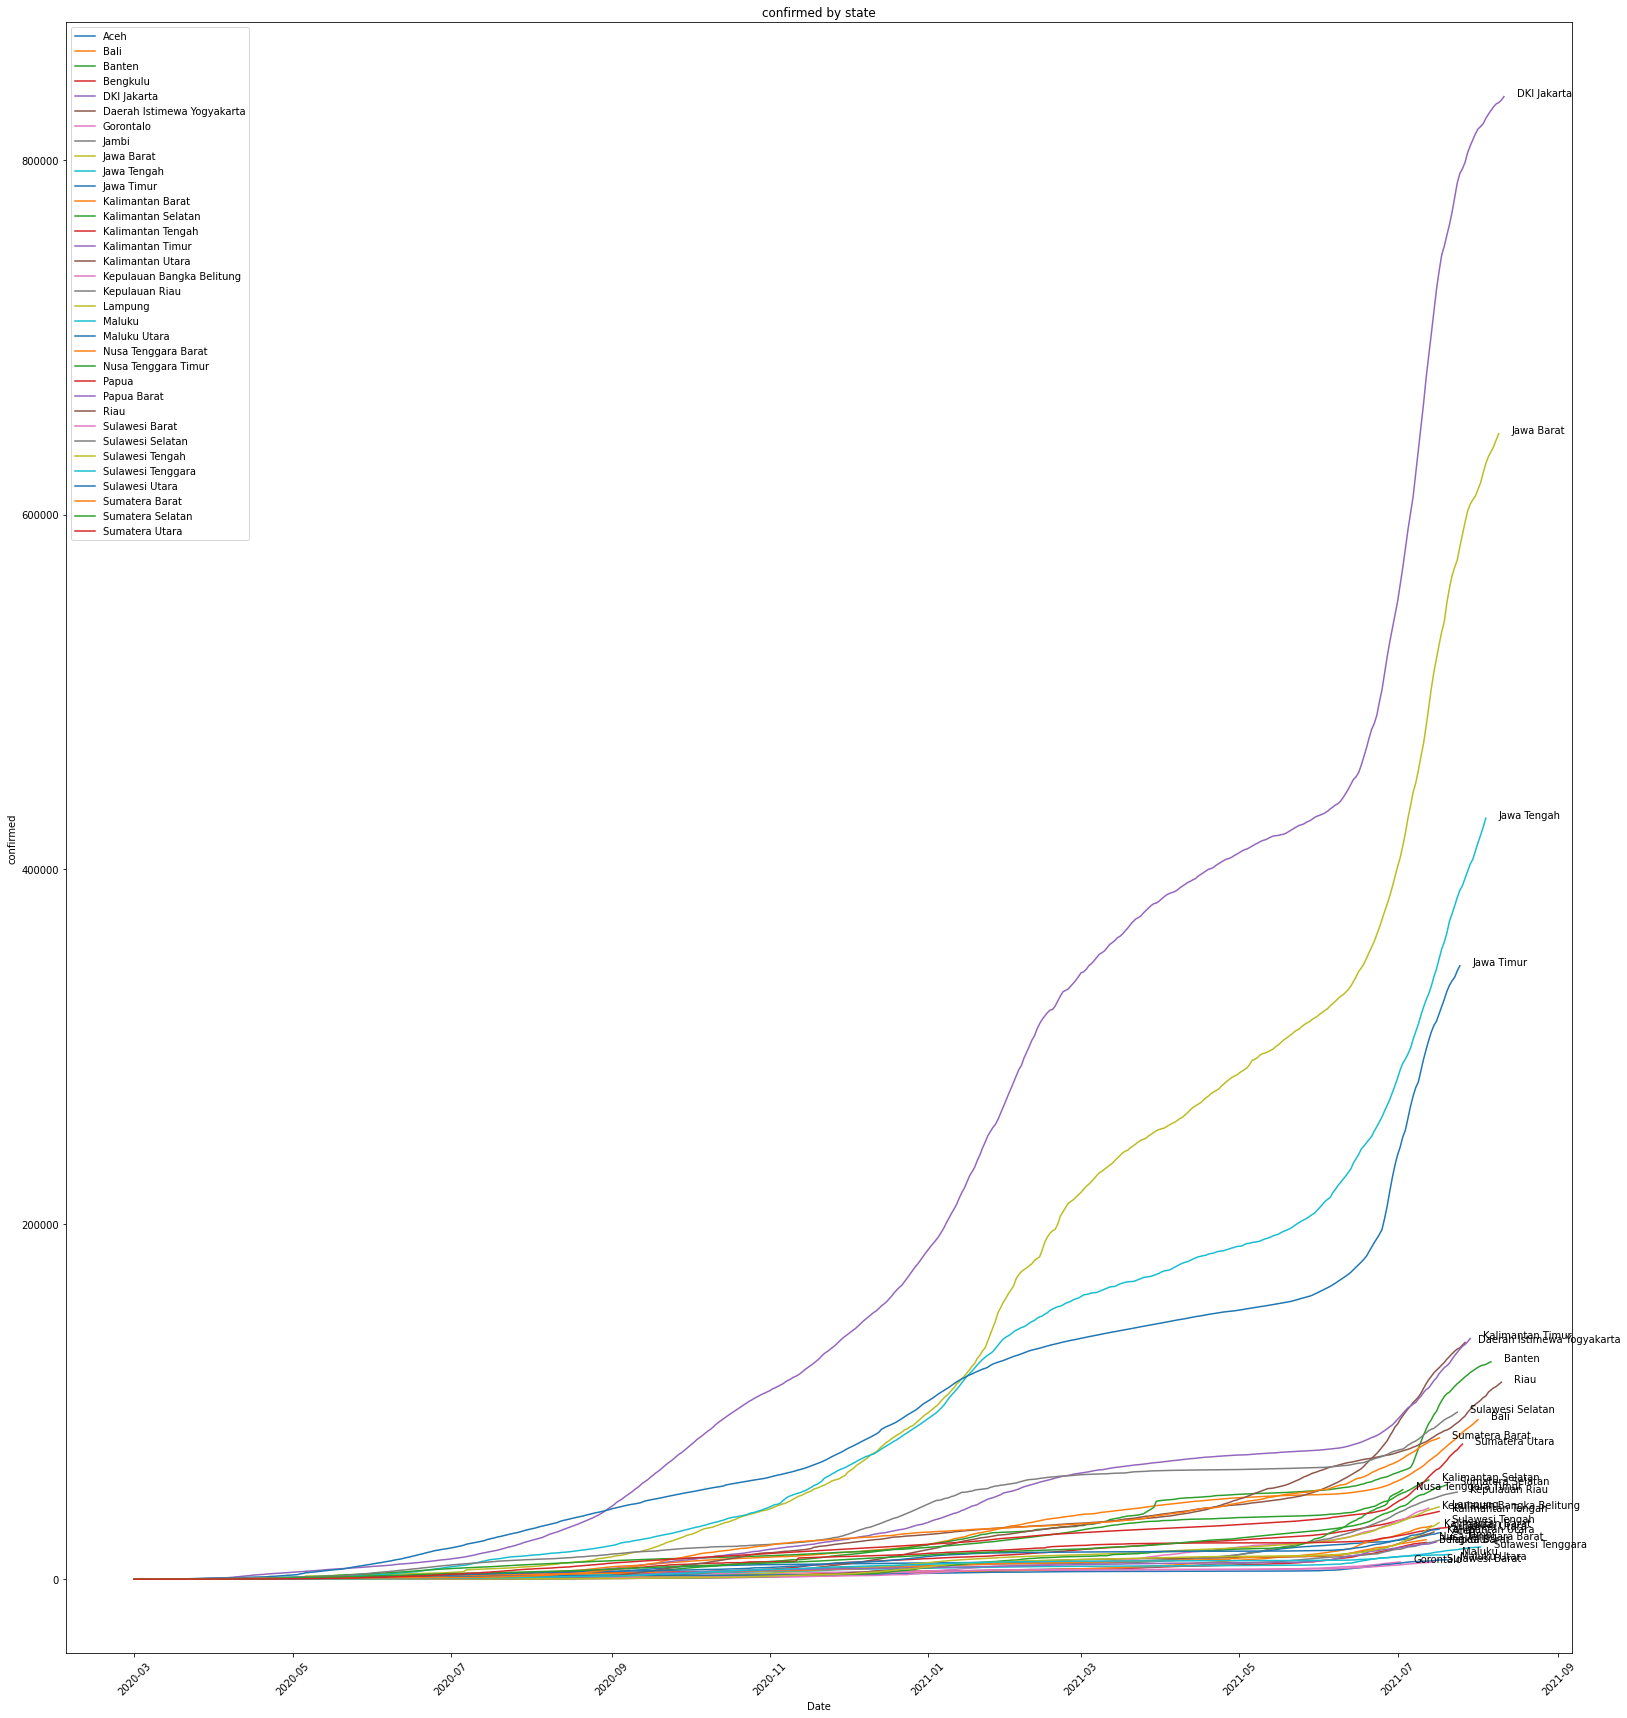

In [28]:
regionPlotter(indonesia_df, 'confirmed')

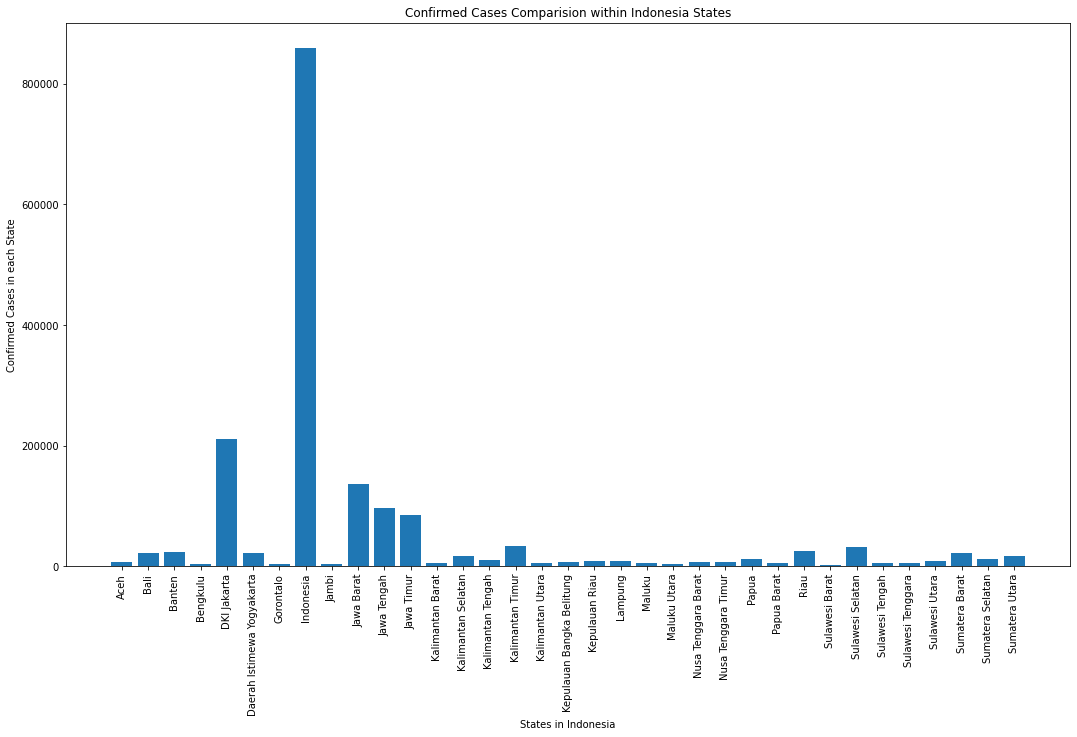

None


In [29]:
def confirmed_indonesia_region():

    """
    Inputs : None
    
    Plots the confirmed cases within Indonesia and compares it to different states
    
    Return Value : None
    """

    group_region_indonesia = indonesia_df.groupby(["region"]).mean()
    confirmed_region_indonesia = colToList(group_region_indonesia, 'confirmed')

    region_list = list(group_region_indonesia.index)

    plt.figure(figsize=(18, 10))
    cmap = plt.cm.tab10
    plt.bar(region_list, confirmed_region_indonesia)
    plt.xlabel('States in Indonesia')
    plt.ylabel('Confirmed Cases in each State')
    plt.title('Confirmed Cases Comparision within Indonesia States')
    plt.xticks(rotation = 90)
    return plt.show()
print(confirmed_indonesia_region())

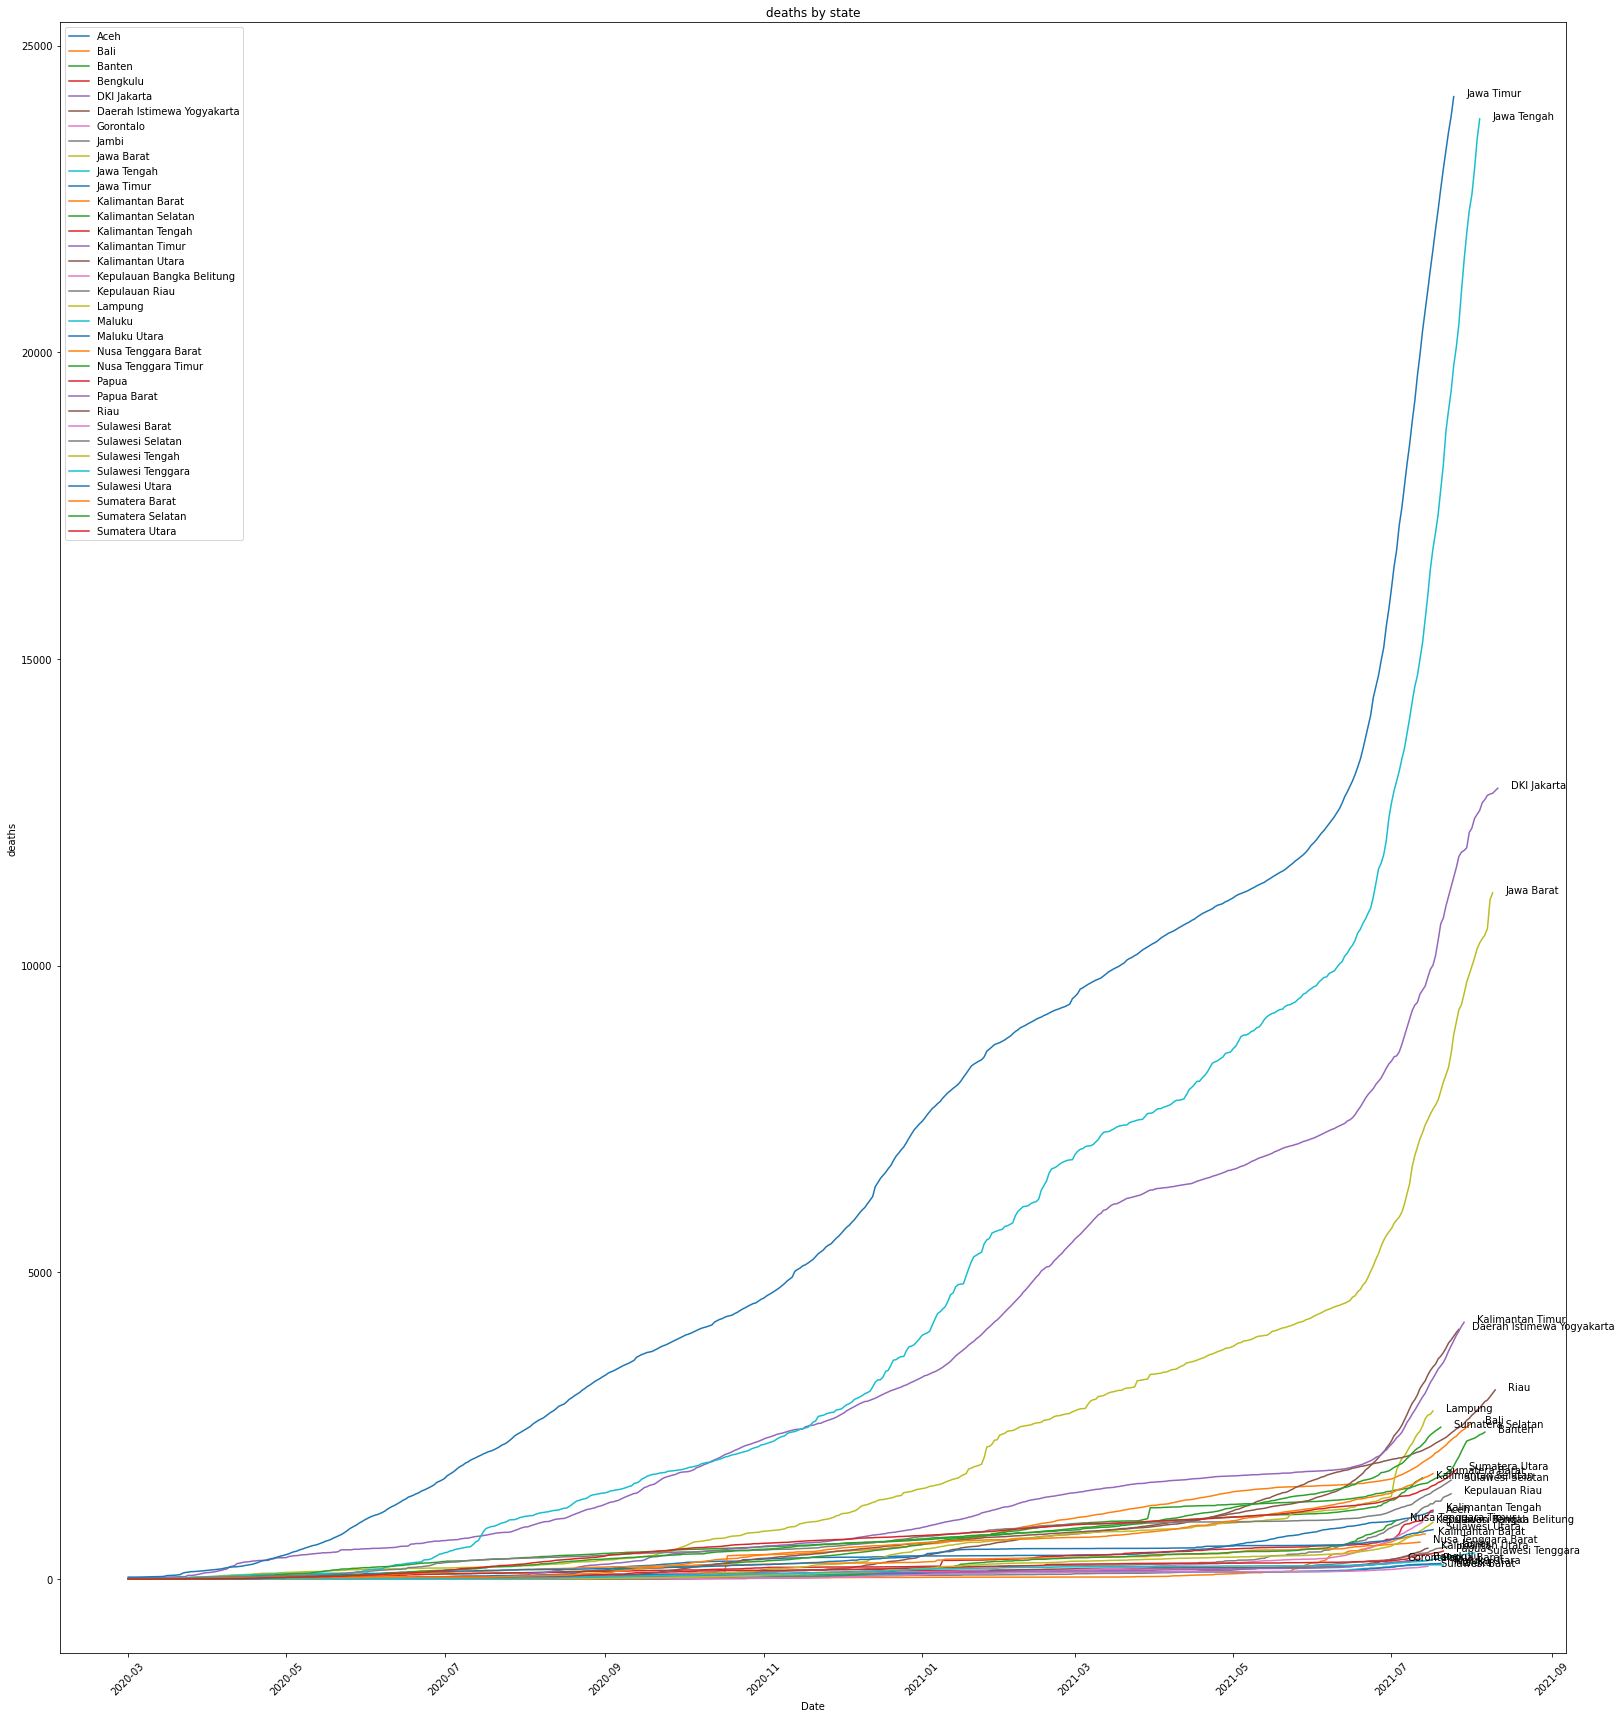

In [30]:
regionPlotter(indonesia_df, 'deaths')

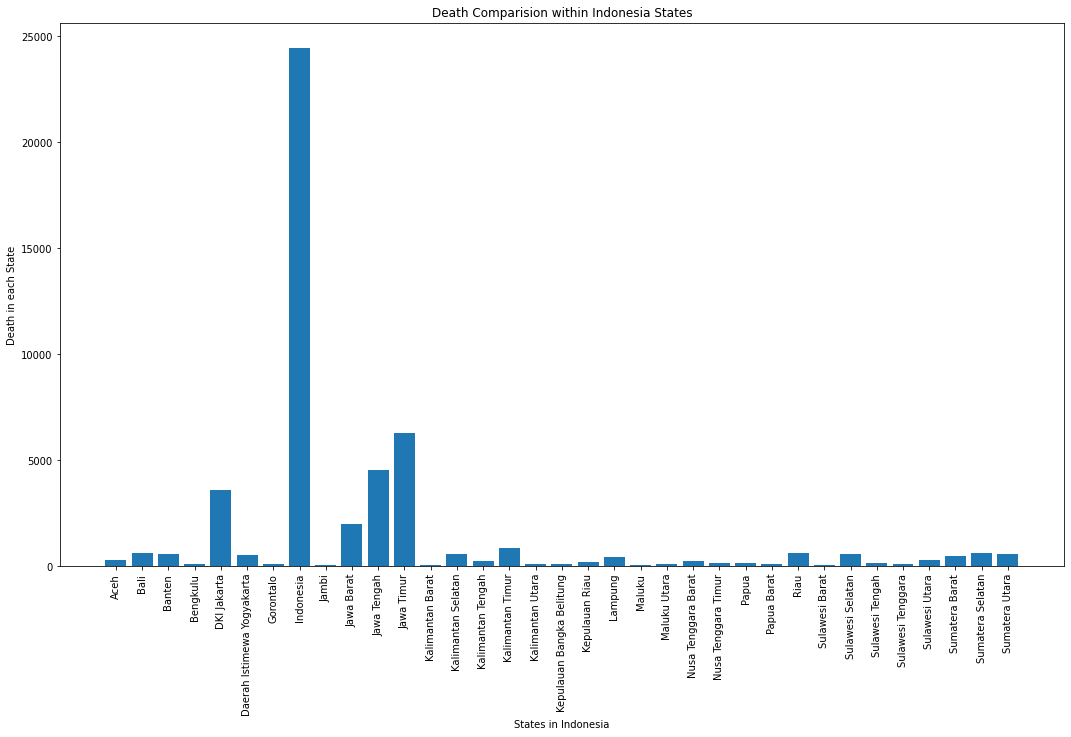

None


In [31]:
def death_indonesia_region():

    """
    Inputs : None
    
    Plots the deaths within Indonesia and compares it to different states
    
    Return Value : None
    """
    
    group_region_indonesia = indonesia_df.groupby(["region"]).mean()
    deaths_region_indonesia = colToList(group_region_indonesia, 'deaths')

    region_list = list(group_region_indonesia.index)

    plt.figure(figsize=(18, 10))
    cmap = plt.cm.tab10
    plt.bar(region_list, deaths_region_indonesia)
    plt.xlabel('States in Indonesia')
    plt.ylabel('Death in each State')
    plt.title('Death Comparision within Indonesia States')
    plt.xticks(rotation = 90)
    return plt.show()
print(death_indonesia_region())

And finally, we pull the mean, median, maximum, and minimum number of confirmed cases and deaths over the period of time that we have selected, in each of the countries that we have datasets for. 

In [32]:
# A few statistics

# Adding a country column to original datasets
india_df['country'] = 'India'
us_df['country'] = 'US'
indonesia_df['country'] = 'Indonesia'
russia_df['country'] = 'Russia'

# Using agg to find all the statistics
combined_df = pd.concat([india_df, us_df, indonesia_df, russia_df], axis = 0)
combined_groupby = combined_df.groupby('country')
combined_groupby.agg({'deaths':['mean', 'median', 'max', 'min'], 'confirmed':['mean', 'median', 'max', 'min']})

deaths                          confirmed                     \
                  mean  median     max min           mean    median      max   
country                                                                        
India      4059.350904   592.0  134201   0  301547.574479   40015.0  6363442   
Indonesia  1463.610391   171.0  112198   0   50944.476463    6824.0  3749446   
Russia       26.577325     5.0    3138   0    2467.056688     528.0   201221   
US         5823.084426  1963.0   64838   0  297951.785771  103386.0  4168517   

               
          min  
country        
India       0  
Indonesia   1  
Russia      1  
US          1

# Conclusion

To conclude, we have succesfully compared the performance of countries during the pandemic against each other, and also compared regional performance within these countries. Among countries, we see that Indonesia has performed the best when it comes to cumulative case counts. We can also see what the worst performing states are using the line graphs built for each country's regions, and we can see which states performed the best in our bar graphs. 